# SMD-Zettel Nr. 2

## Aufgabe 1 

### Aufgabenteil a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Erstelle die aus der Vorlesung bekannte *LCG Funktion*. 
Mit dem Parameter `norm` kann eingestellt werden, ob die Zufallszahlen normiert sein sollen.
Der Parameter `test_eff` prüft die Periodenlänge der Zufallszahlen (noch langsam). 

In [2]:
def LCG(N, x_0, a, c, m, norm = False, test_eff = False): 
    random_numbers = []
    
    for i in range( int(N) ):
        if i != 0:
            x_plus = ( (a * random_numbers[-1] + c) % m )
            random_numbers.append(x_plus)
        else:
            x_plus = ( (a * x_0 + c) % m )
            random_numbers.append(x_plus)
            
        if test_eff == True:
            if len( np.array(random_numbers[:-1])[ np.array(random_numbers[:-1]) == random_numbers[i]] ) != 0:
                print('Doppeltes Element bei i =',i)
                return i
                break
        
    if norm == True:
        return np.array(random_numbers)/m
    
    return np.array(random_numbers)

Die Parameter sind [hier](https://en.wikipedia.org/wiki/Linear_congruential_generator) entommen worden.
Die Periodenlänge wurde zu $>10^5$ bestimmt.

In [3]:
# source: https://en.wikipedia.org/wiki/Linear_congruential_generator
x_0 = 1
a = 1664525
c = 1013904223
m = 2**32 #Ausschöpfung des 32 Bit Bereichs + Primzahl

numbers = LCG(1e6, x_0, a, c, m, True, False)

Auf ein festes Intervall $[x_0, x_1]$ können die  _normierten_ Zufallszahlen mittels der Funktion `linear_trafo` transformiert werden.

In [4]:
def linear_trafo(random_numbers, x_0, x_1):
    assert x_1 > x_0
    return (x_1 - x_0) * random_numbers + x_0

## Aufgabenteil b)

Die Normierungskonstante $N$ der Funktion $f(t)$
lautet $N=\frac{1}{\tau}$.
Die Transformationsvorschrift $T(u)$ für die erzeugten Zufallszahlen $u\in\left[0,1\right)$ erhält man wie folgt:

$$
\begin{aligned}
F(x)&=\int_{0}^{x} N \exp\left(-\frac{t}{\tau}\right)\mathrm{d}t\\
&=-\left(\exp\left(-\frac{x}{\tau}\right)-1\right)\\
F(x) &\overset{!}{=}u\\
\Leftrightarrow \quad x&=T(u):=-\tau\ln(1-u)
\end{aligned}
$$



In [5]:
def T_b(random_numbers, tau):
    return -tau * np.log(1 - random_numbers)

(array([7.31496e+05, 1.96374e+05, 5.29900e+04, 1.40390e+04, 3.70400e+03,
        9.94000e+02, 3.05000e+02, 6.80000e+01, 2.40000e+01, 6.00000e+00]),
 array([2.61468847e-06, 1.31617744e+01, 2.63235462e+01, 3.94853180e+01,
        5.26470899e+01, 6.58088617e+01, 7.89706335e+01, 9.21324053e+01,
        1.05294177e+02, 1.18455949e+02, 1.31617721e+02]),
 <a list of 10 Patch objects>)

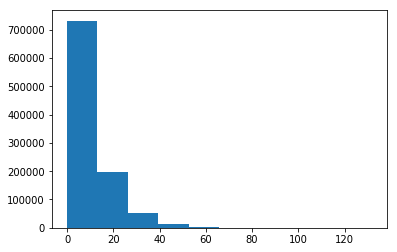

In [6]:
plt.hist(T_b(numbers, 10))

## Aufgabenteil c)

Die Nomrmierung $N$ der Funktion $f(x)$ lautet
$$ N = \frac{n-1}{x_{\mathrm{max}}^{-n+1}-x_{\mathrm{min}}^{-n+1}}$$

Die Transformationsformel $T(u)$ der Zufallszahlen $u$ ergibt sich wie folgt:

$$
\begin{aligned}
F(x)&=\int_{x_{\mathrm{min}}}^x N x'^{-n}\mathrm{d}x'\\
&=\frac{1}{ x_{ \mathrm{max} }^{-n+1} -x_{\mathrm{min}}^{-n+1} }\left(x^{-n+1}-x_{\mathrm{min}}^{-n+1}\right)\\
F(x)&\overset{!}{=}u\\
\Leftrightarrow \quad T(u):=x&=\left(\left(x_{ \mathrm{max} }^{-n+1} -x_{\mathrm{min}}^{-n+1} \right)u+x_{\mathrm{min}}\right)^{\frac{1}{1-n}}
\end{aligned}
$$

Die Transformation funktioniert nur für folgende Defintionsmengen:
$$
\begin{aligned}
x_{\mathrm{min}},\, x_{\mathrm{max}} \in \mathbb{R}^+/\{0\} \quad \vee \quad
x_{\mathrm{min}},\, x_{\mathrm{max}} \in \mathbb{R}^-/\{0\}
\end{aligned}
$$

In [7]:
def T_c(random_numbers, x_min, x_max, n):
    assert  (x_max > x_min)
    assert n > 1
    exponent = 1-n
    return ( (x_max**exponent - x_min**exponent) * random_numbers + x_min**exponent )**(1/exponent)

__Gemischte Vorzeichen funktionieren noch nicht !!!__

(array([ 52528.,  58512.,  65506.,  73105.,  83461.,  95328., 109275.,
        128603., 151585., 182097.]),
 array([-3.99999895, -3.79999925, -3.59999955, -3.39999984, -3.20000014,
        -3.00000044, -2.80000074, -2.60000103, -2.40000133, -2.20000163,
        -2.00000192]),
 <a list of 10 Patch objects>)

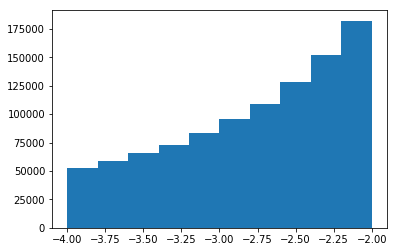

In [8]:
plt.hist(T_c(numbers, -4,-2, 2))
#plt.plot(numbers,T_c(numbers, 1,5,3))

## Aufgabenteil d)

Die Normierungskonstante $N$ lautet:
$$ N=\frac{1}{\arctan(x_\mathrm{max})-\arctan(x_\mathrm{min})}$$

Für den Speziallfall $x_\mathrm{min}=-\infty$ und $x_\mathrm{max}=\infty$ ist $N=\pi$.


Die Transformationsformel $T(u)$ der Zufallszahlen $u$ ergibt sich durch folgende Rechnung:

$$\begin{aligned}
F(x)&=\frac{1}{N}\int_{x_{\mathrm{min}}}^x\frac{1}{1+x'^2}\mathrm{d}x'\\
&=\frac{1}{N}\left( \arctan(x) - \arctan(x_{\mathrm{min}}\right)\\
F(x)&\overset{!}{=} u\\
\Leftrightarrow \quad T(u):=x&=\tan(\left(\arctan(x_\mathrm{max})-\arctan(x_\mathrm{min}\right) u + \arctan(x_{\mathrm{min}}))
\end{aligned}$$

In [9]:
def T_c(random_numbers, x_min, x_max):
    assert x_max > x_min
    
    return np.tan((np.arctan(x_max) - np.arctan(x_min)) * random_numbers + np.arctan(x_min))

(array([ 29147.,  44988.,  75240., 134001., 216122., 216289., 134562.,
         75227.,  45119.,  29305.]),
 array([-2.99999347e+00, -2.39999892e+00, -1.80000438e+00, -1.20000984e+00,
        -6.00015293e-01, -2.07493913e-05,  5.99973794e-01,  1.19996834e+00,
         1.79996288e+00,  2.39995743e+00,  2.99995197e+00]),
 <a list of 10 Patch objects>)

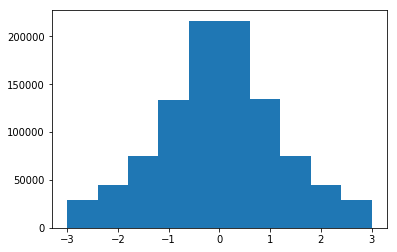

In [10]:
plt.hist(T_c(numbers,-3,3))

## Aufgabenteil e)

Importierte die Datei `empirisches_histogramm.npy`. 
Die in der Datei enthaltente Verteilung wird im Weiteren als $p(x)$ bezeichnet.

In [11]:
data = np.load("./empirisches_histogramm.npy")

In [12]:
data['bin_mid']

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])

(array([ 38.,  45.,  38.,  55.,  36.,  41.,  35.,  43.,  28.,  44.,  40.,
         33.,  35.,  35.,  31.,  43.,  48.,  46.,  59.,  77.,  75., 102.,
        119., 165., 208., 207., 250., 309., 414., 414., 435., 441., 489.,
        510., 535., 502., 557., 469., 487., 403., 382., 318., 276., 262.,
        232., 182., 142., 107.,  93.,  65.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

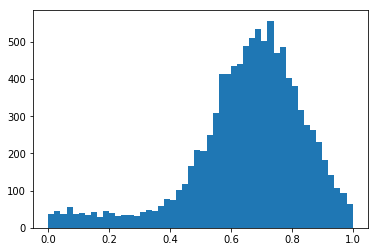

In [13]:
plt.hist(data['bin_mid'], bins=np.linspace(0., 1., 51), weights=data['hist'])

Bestimme die maximale Höhe von $p(x)$:

In [14]:
p_max = max(data['hist'])
print('Maximale Höhe von p(x):',p_max)

Maximale Höhe von p(x): 557.0


Verfahre mit dem *Neumann'schen Rückweisungsverfahren*, dazu benötige ich zwei Zufallszahlen $u_1$ und $u_2$. Wobei die Wertebereiche der beiden Zufallszahlen der Verteilung $p(x)$ angepasst werden müssen:

$$u_1\in\left[0,1\right], \quad u_2\in\left[0,\mathrm{max}(p(x))\right]=\left[0,557\right]$$


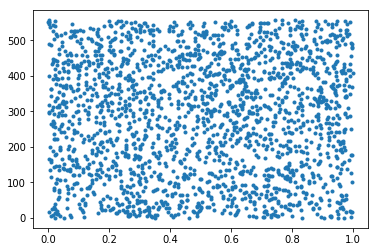

In [15]:
u_1 = LCG(1e6, 1, a, c, m, True, False)
u_2 = linear_trafo(LCG(1e6, 2, a, c, m, True, False),0, p_max) 
plt.plot(u_1[::500],u_2[::500],'.')


In [16]:
def neumann_random(random_numbers_x, random_numbers_y, real_x_values, real_y_values):
    good_number = []
    for i in range(len(real_x_values)):
        
        print(real_x_values[i],real_y_values[i])
        
        possible_u_1_index = np.abs(u_1 - real_x_values[i]) < 1e-2
        possible_u_2_index = np.abs(random_numbers_y - real_y_values[i]) < 1
        valid_numbers = random_numbers_x[(possible_u_1_index == True) & (possible_u_2_index == True)]
        
        print(random_numbers_x[(possible_u_1_index == True) & (possible_u_2_index == True)],'\n\n------')
        print(random_numbers_y[(possible_u_1_index == True) & (possible_u_2_index == True)],'\n\n *******')
        
        good_number.extend(valid_numbers.tolist())
        #print(good_number,'\n\n----------------------\n\n')
    return np.array(good_number) 

In [17]:
good_numbers = neumann_random(u_1, u_2, data['bin_mid'], data['hist'] )

0.01 38.0
[0.00226895 0.01750312 0.01556312 0.00288126 0.01929738 0.00699503
 0.01403982 0.00746893 0.01806675 0.01125095 0.01844117 0.00964464
 0.01640801 0.00156738 0.00265617 0.01864598 0.00363823 0.00016526
 0.01598303 0.0130605  0.01172438 0.01300151 0.01365151 0.01351302
 0.00370923 0.01728599 0.00521029 0.0079852  0.00503544 0.00607531
 0.01989277 0.0148443  0.01244054 0.01691851 0.01939389 0.00115418
 0.01472961 0.01895978 0.00522261 0.0111148  0.00748984 0.01545318
 0.0105823  0.0161972  0.01875568 0.01206385 0.00848063 0.00941533
 0.01346972 0.00946301 0.01161265 0.00817892 0.00528706 0.01385031
 0.01622833 0.00768092] 

------
[37.30468482 37.2156378  38.03203211 37.30818843 37.50060649 37.8277581
 37.85811347 38.78822042 37.04603565 38.55443245 37.52493545 37.78700432
 38.26582021 37.53788427 37.7438398  38.12528396 38.84890263 37.45382591
 37.86287842 38.4675713  38.74606525 38.00212533 38.39534114 38.11603431
 38.5472849  37.42386362 38.77000165 37.85354461 37.50901472 38

[28.52038465 28.37029088 27.853216   28.22930617 28.15575839 27.98049425
 28.80838036 27.92149395 27.68507126 28.33945917 27.00052395 27.72579677
 28.37351424 27.24560776 28.9243917  27.86737013 28.55455203 28.12974753
 27.75629246 28.86306469 28.18843969 28.096842   27.98856673 27.7104372
 27.14946908 27.99571428 27.95165272 28.83310175 27.11135002 28.35117532
 28.04386759 27.31293265 28.22725958 28.09538432 27.21511233 28.24671167
 27.0701474  28.33777726 27.97993388 28.11618204 28.08131371 28.23479957
 27.22567933 27.08063023 28.39913242 27.03956793 28.2776553  28.64525294
 28.47853814 27.18357979 28.61125403 27.05417091 27.80158644 27.51630987
 28.57512527 27.44340703 28.97223687 27.97662622 27.61410244 27.33294563
 27.39343175 28.83341001 28.19264401 28.60662966 27.67775564 27.03892352
 27.43794139 27.23652645 28.18370302 27.52967966 28.45039678 27.14952524
 27.46498884 28.31157018 28.29200656 28.49423373 27.22943492] 

 *******
0.19 44.0
[0.19069602 0.1924522  0.19654544 0.183812

[0.35734758 0.35688522 0.35853429 0.34845086 0.34874921 0.35422243
 0.3548448  0.3497532  0.34444594 0.35063702 0.35732401 0.35698618
 0.34802174 0.35325808 0.35181546 0.35649082 0.34886032 0.35604446
 0.34718808 0.35394342 0.34103203 0.35638861 0.35964469 0.35982905
 0.34111348 0.35164069 0.3473261  0.35084409 0.35996832 0.3548704
 0.35581765 0.34503258 0.34834881 0.3509836  0.34096438 0.35824834
 0.34528646 0.34516436 0.35407824 0.34389721 0.34568453 0.34868508
 0.34586679 0.35559748 0.35436185 0.34907784 0.34060197 0.35961988
 0.34790408 0.34607713 0.3458767  0.34801776 0.34688723 0.35800686
 0.35725489 0.34727601 0.34239905 0.35369469 0.34776271 0.34612644
 0.35348848 0.35732354 0.35675415 0.34891376 0.3529836  0.35084144
 0.3448078  0.3562403  0.34482075 0.35523382 0.35838526 0.35522656
 0.3595488  0.35590582 0.34576419 0.34365784 0.35407528] 

------
[45.20788663 46.03591292 46.10295781 45.49733962 45.70576166 46.58384752
 46.49527659 46.803537   45.87620457 45.59880387 45.848652

[0.56040948 0.57952632 0.56404692 0.57020625 0.56624776 0.57761502
 0.57400973 0.57650048 0.57607144 0.56919338 0.5685071  0.56618136
 0.56119305 0.57019853 0.5777049  0.57624559 0.57863539 0.57679962
 0.57644579 0.56439513 0.57953498 0.5639384  0.57611015 0.5619561
 0.57347489 0.57343455 0.56509491 0.57896339 0.56121412 0.57576779
 0.56891235 0.57615087 0.57180632 0.56509343 0.57587756 0.57927243
 0.56511754 0.5645699  0.56033482 0.56645225 0.57365247 0.56019484
 0.57730114 0.56344257 0.57059863 0.57791782 0.56223792 0.57863711
 0.56592475 0.56639881 0.56966526 0.56653175 0.560468   0.56893661
 0.56812745 0.5614602  0.57458943 0.56758021 0.56359822 0.57622234
 0.5631095  0.56573164 0.57641622 0.57041816 0.5724585  0.57018847
 0.5660385  0.56269957 0.56687926 0.5725057 ] 

------
[413.54814403 413.96675444 413.01341101 413.21978711 414.4882576
 414.28855284 413.87207306 413.3517468  413.48844316 414.13616011
 413.99752973 414.59314131 414.45891133 413.83162741 413.96882852
 413.5961858

[402.06061007 403.66178212 402.38350122 403.31318798 402.5876353
 402.79785064 403.63299635 403.66769635 402.33389036 403.91123831
 402.94278794 402.63068712 402.9739558  403.33193912 403.29446486
 402.37626976 403.50070077 403.46827119 403.34516898 402.53715541
 403.72097889 403.02723822 403.65864305 402.6753372  403.5817041
 402.95747496 403.27016378 402.02781595 402.26278147 403.0894624
 403.21396601 402.0052812  403.44909974 402.1608969  403.58366587
 403.16598103 403.27949759 402.11593882 402.77085909 403.99781895
 403.91429334 403.33418192 402.92924995 403.97407903 403.77372921
 402.13861401 402.82915882 403.72453879 403.85330261 402.27186278
 403.03469416 402.25924985 402.58945713 403.37748586 402.716427
 403.78981761 403.17694034 402.19646516 403.2428637  402.85357208
 403.57674281 402.10265281 403.57116498 402.81643409 403.40422543
 403.22492518 403.65079506 403.97164053 403.38143819 403.9479281
 402.93634122 402.17446265 403.70732911 402.90741539 402.52286031
 402.70283337 40

(array([56., 78., 71., 66., 70., 75., 60., 81., 77., 72., 81., 84., 71.,
        63., 79., 60., 64., 77., 84., 73., 77., 75., 70., 69., 73., 86.,
        73., 69., 70., 65., 70., 62., 84., 65., 73., 71., 32., 72., 75.,
        78., 70., 78., 81., 88., 62., 72., 73., 72., 62., 75.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

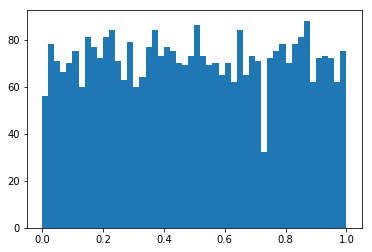

In [18]:
plt.hist(good_numbers,bins=np.linspace(0., 1., 51))

In [19]:
u_1 < 0.5

array([ True,  True, False, ...,  True,  True,  True])

Ideen:
1. Plotte mal die Wertepaare die angeblich passen.

__----------------------------------------------------------------------------------------__

__----------------------------------------------------------------------------------------__

__----------------------------------------------------------------------------------------__

## Aufgabe 2

Verwende die in Aufgabenteil definierte Funktion.

In [20]:
def LCG(N, x_0, a, c, m, norm = False, test_eff = False): 
    random_numbers = []
    
    for i in range(int(N)):
        if i != 0:
            x_plus = ( (a * random_numbers[-1] + c) % m )
            random_numbers.append(x_plus)
        else:
            x_plus = ( (a * x_0 + c) % m )
            random_numbers.append(x_plus)
            
        if test_eff == True:
            temporary_array = np.array(random_numbers[:-1])
            if len( temporary_array[ temporary_array == random_numbers[i]] ) != 0:
                #print('Doppeltes Element bei i =',i)
                return i
                break
    
    if norm == True:
        return np.array(random_numbers)/m
    
    return np.array(random_numbers)


### Aufgabenteil a)

In [21]:
b = 3
m = 1024


In [22]:
length_list = []
a = []
for i in range(0,100,2):
    #Achtung habe LCG geändert
    length = LCG(1e4, 10, i, b, m, True, True)
    length_list.append(length)
    a.append(i)
length_list = np.array( length_list)
a = np.array(a)

Die maximale Periodenlänge ist:

In [23]:
print('Maximale Länge:',max(length_list))

Maximale Länge: 10


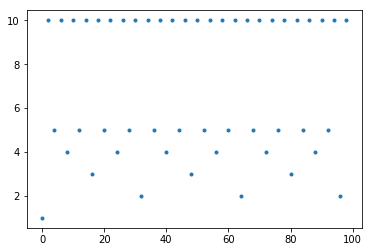

In [24]:
plt.plot(a,length_list,'.')

In [25]:
a[length_list == max(length_list)]

array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66,
       70, 74, 78, 82, 86, 90, 94, 98])

__Irgendwie passt das nicht mit den Ergebniss aus der Vorlesung, bei mir ist (a-1) nicht durch 2 teilbar__

Lege die Parameter für den Generator nach dem Zettel fest

In [26]:
a = 1601
b = 3456
m = 10000

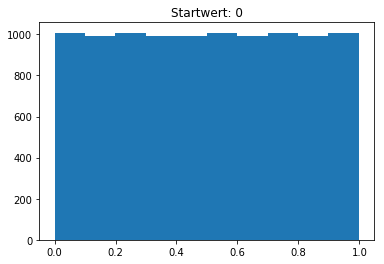

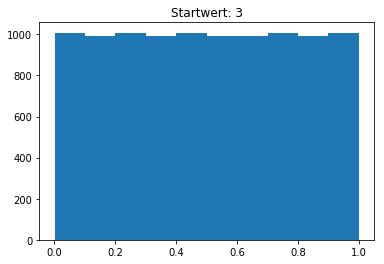

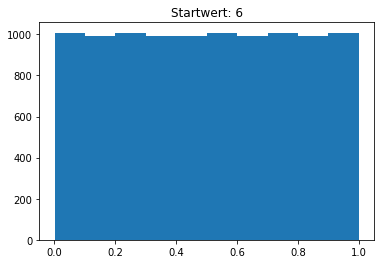

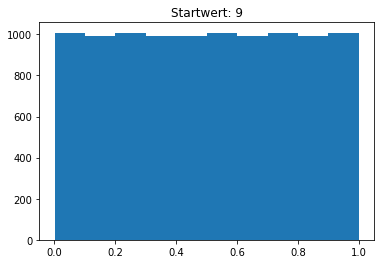

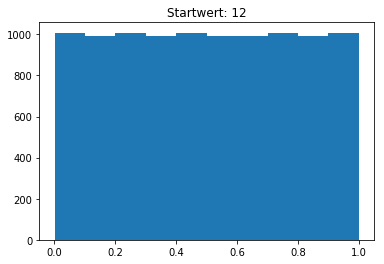

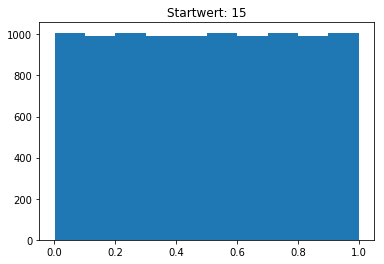

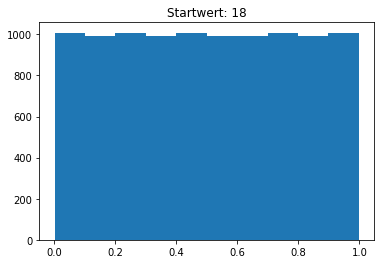

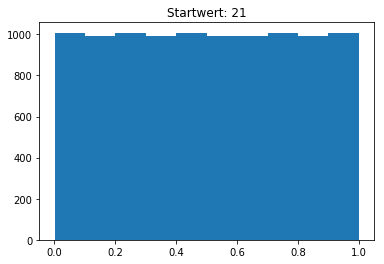

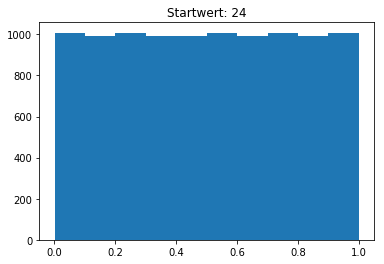

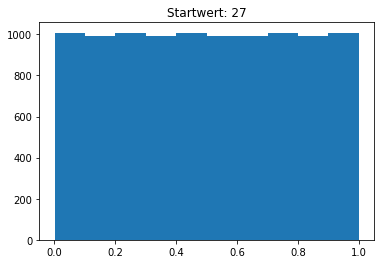

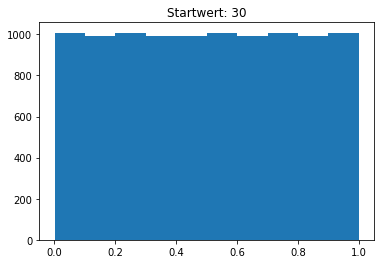

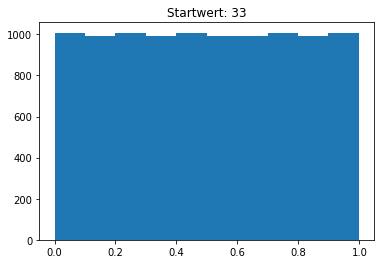

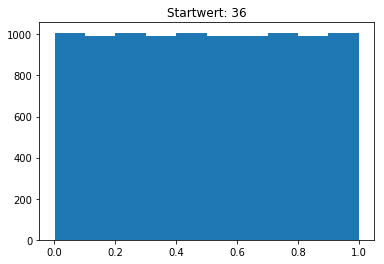

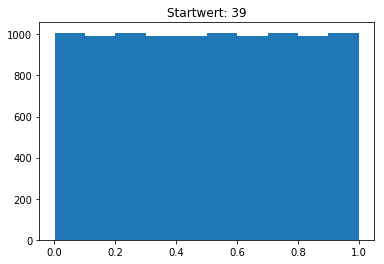

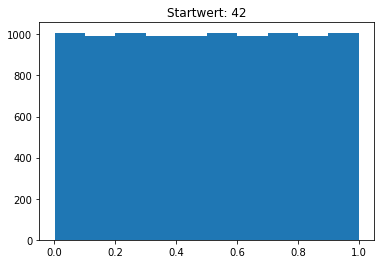

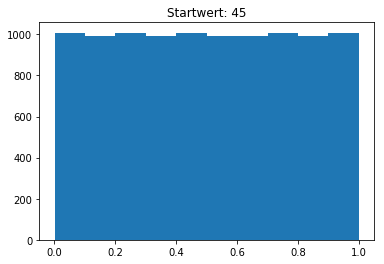

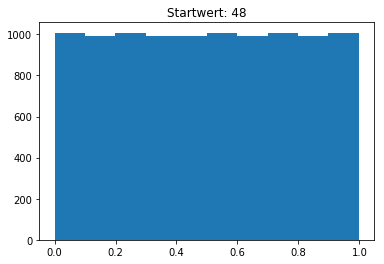

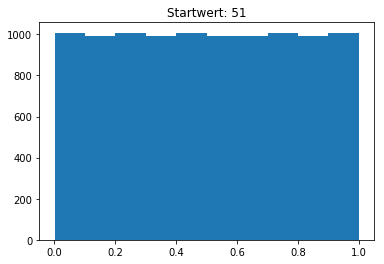

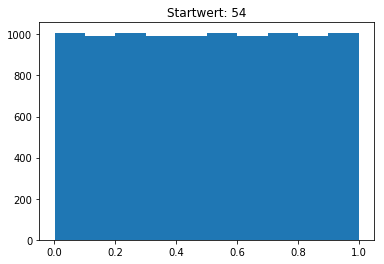

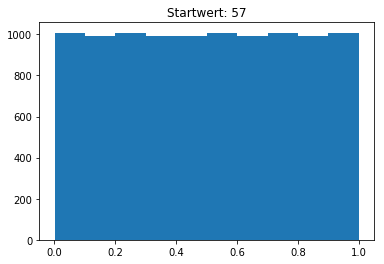

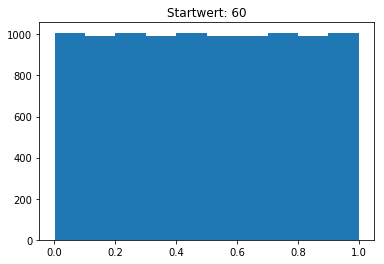

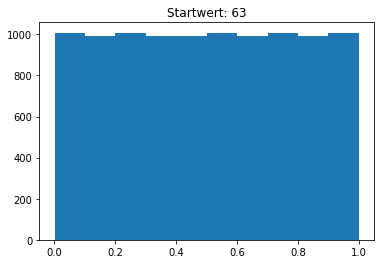

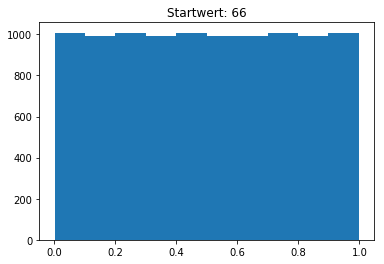

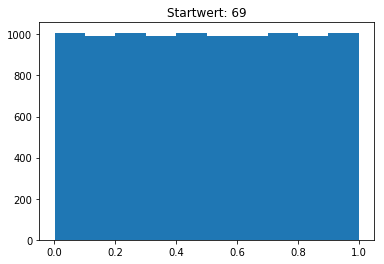

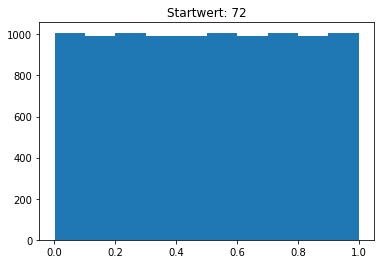

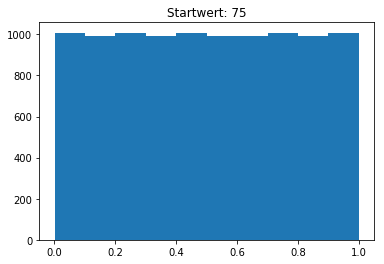

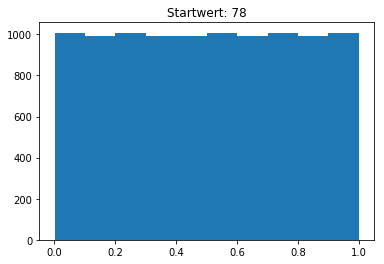

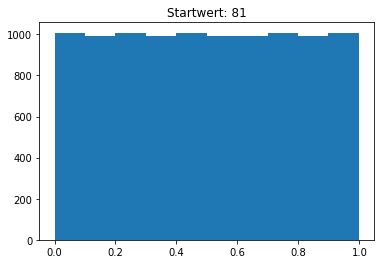

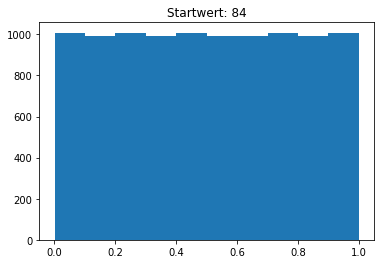

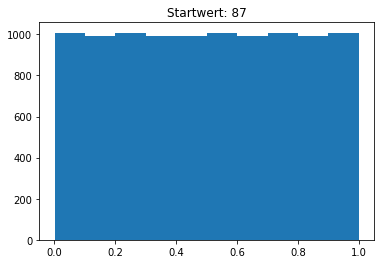

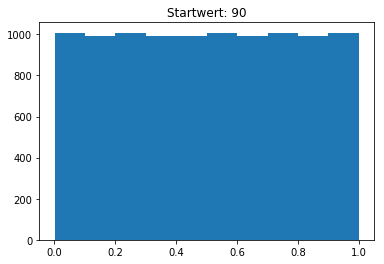

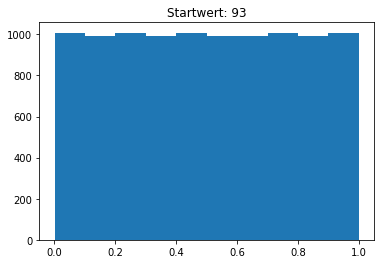

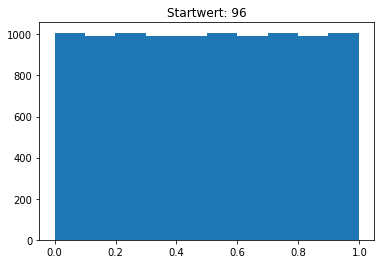

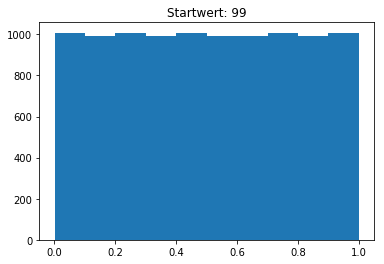

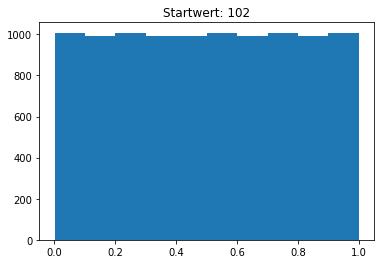

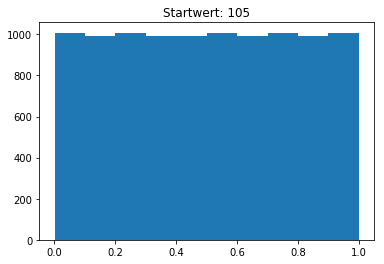

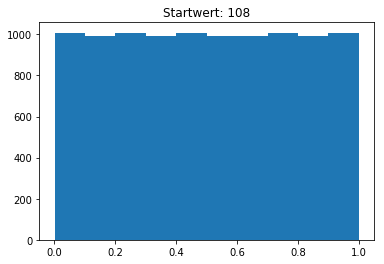

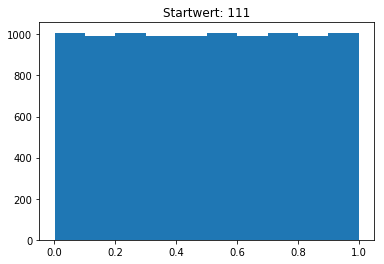

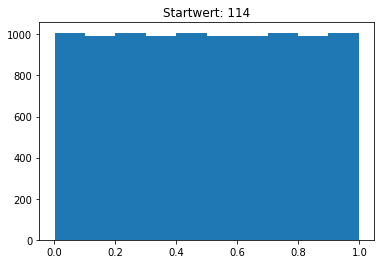

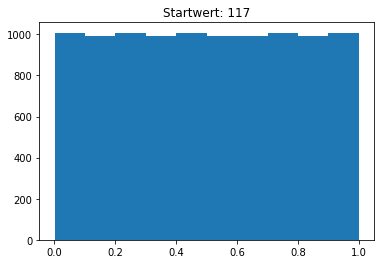

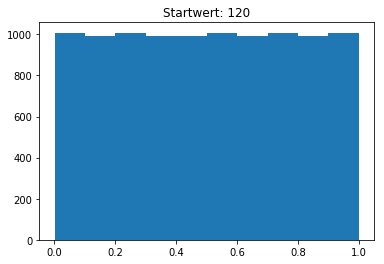

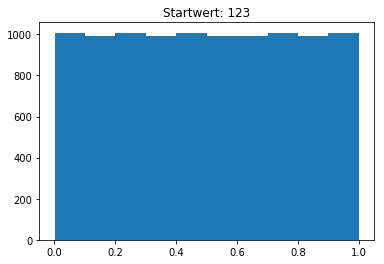

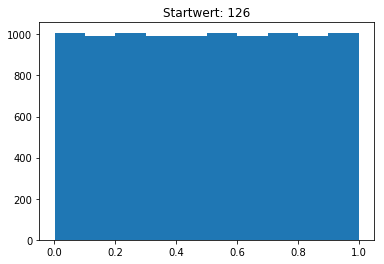

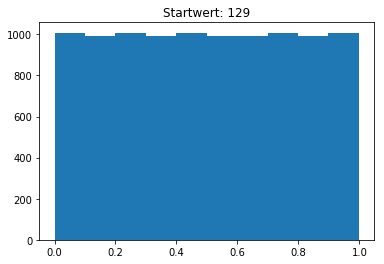

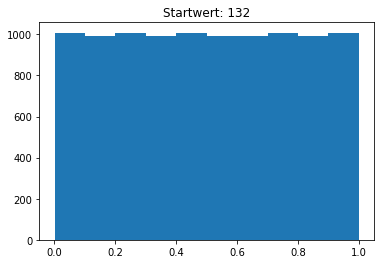

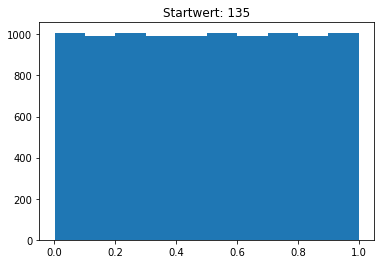

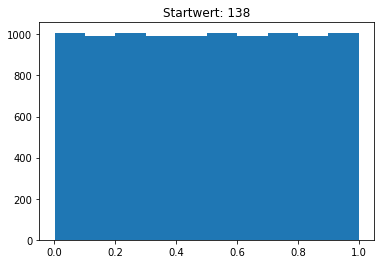

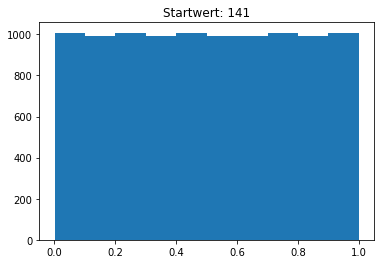

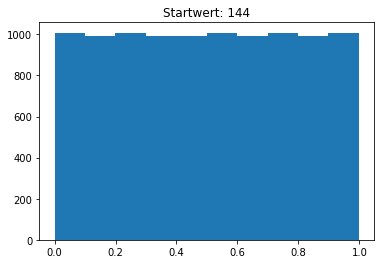

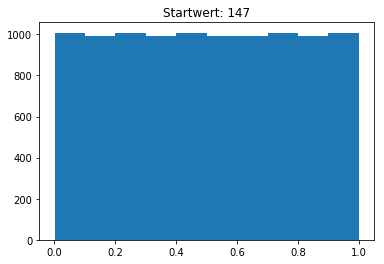

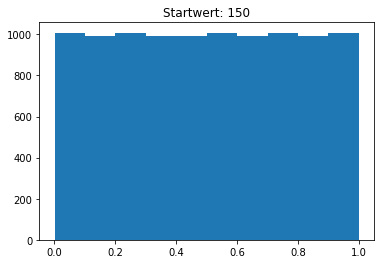

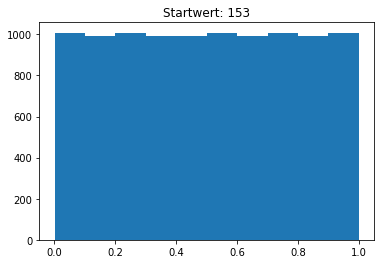

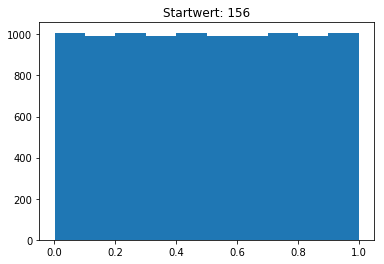

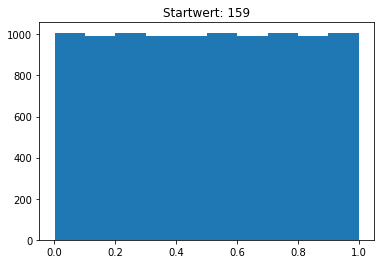

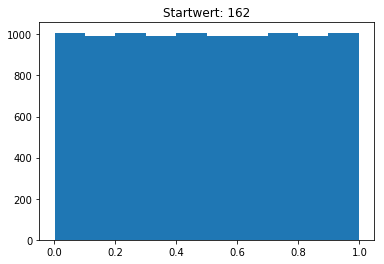

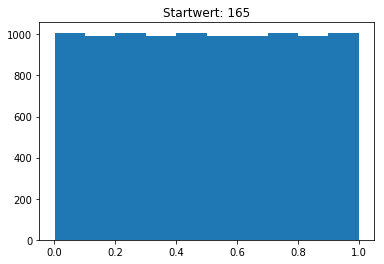

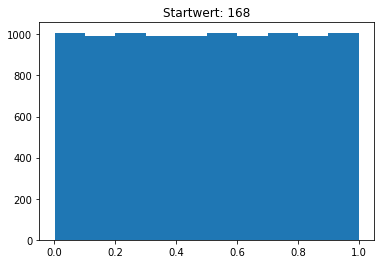

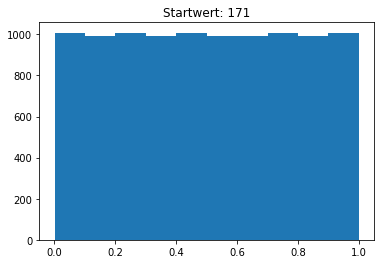

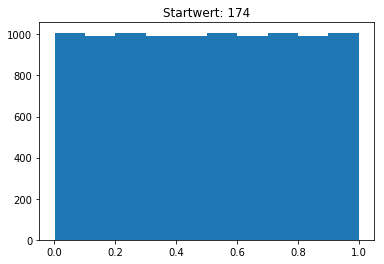

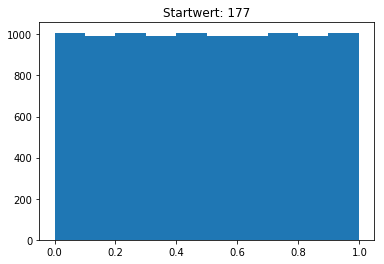

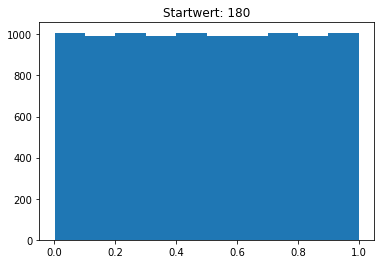

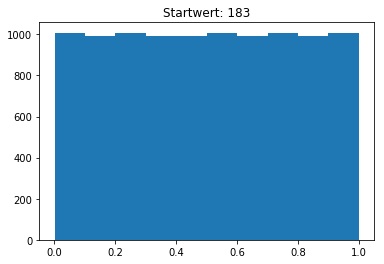

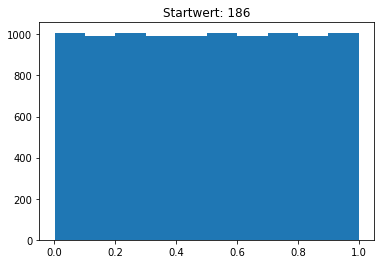

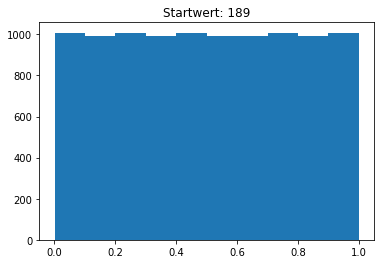

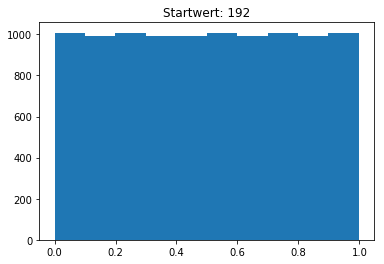

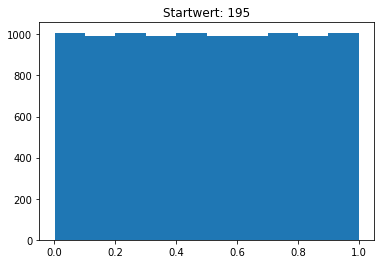

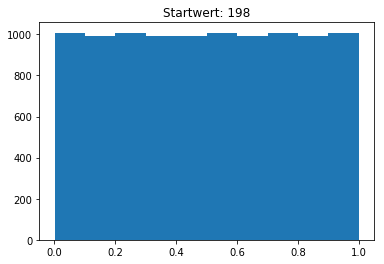

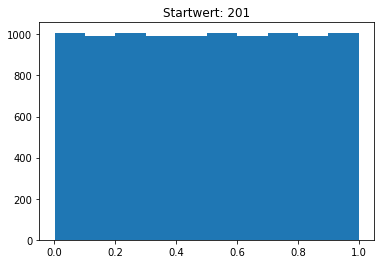

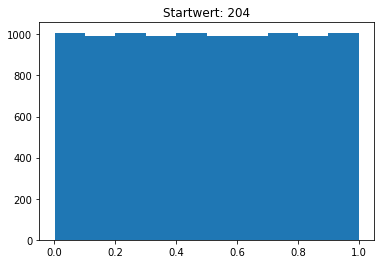

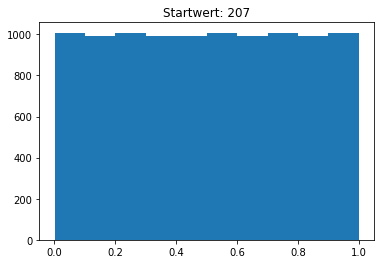

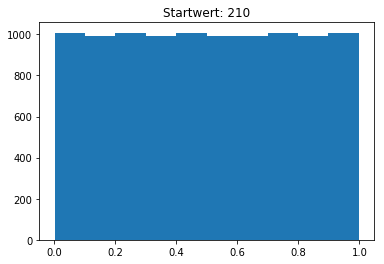

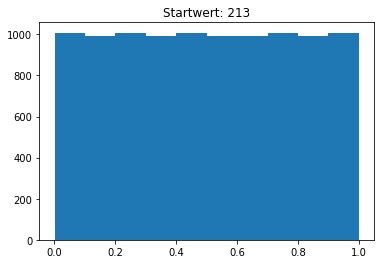

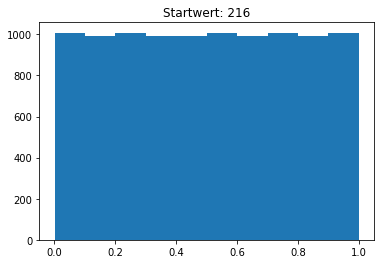

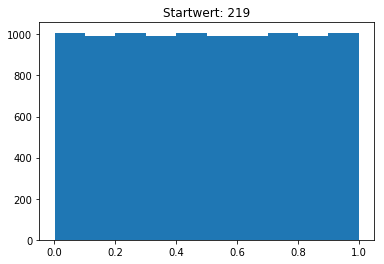

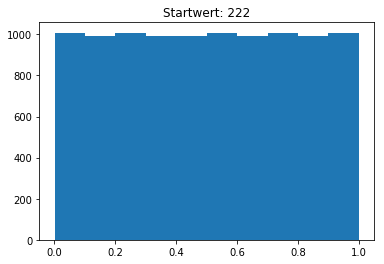

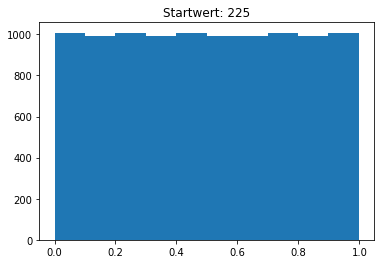

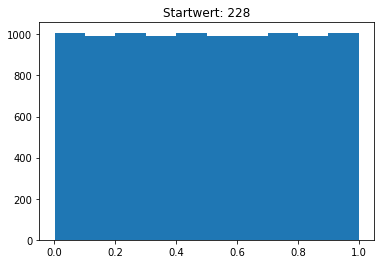

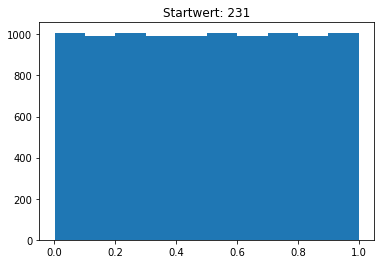

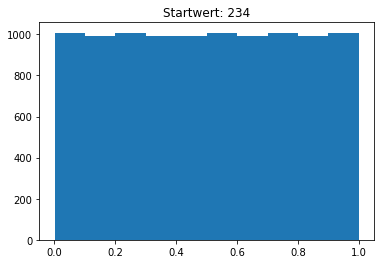

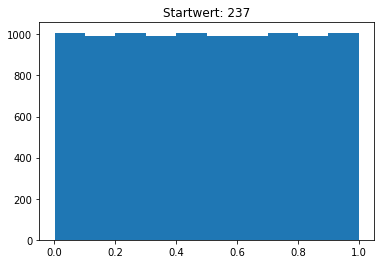

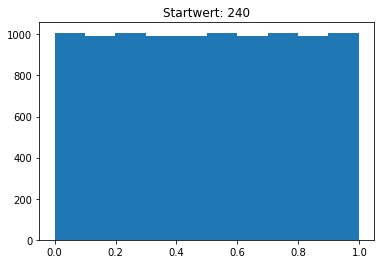

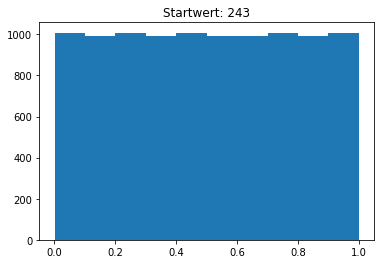

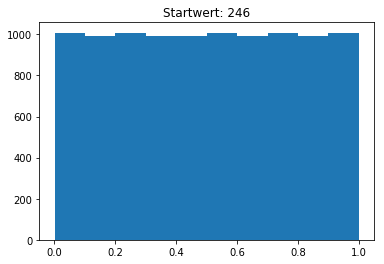

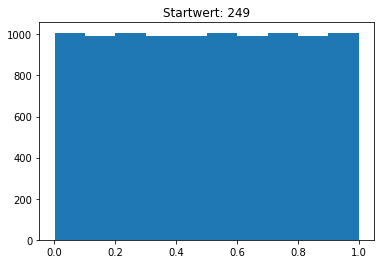

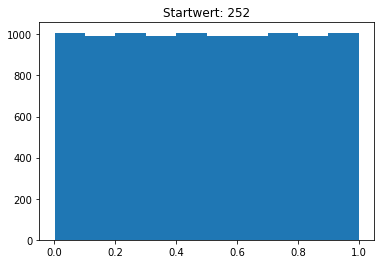

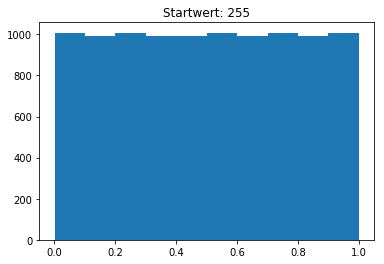

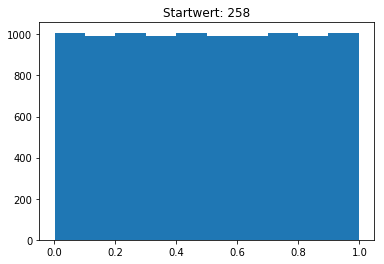

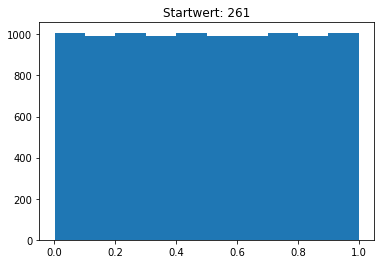

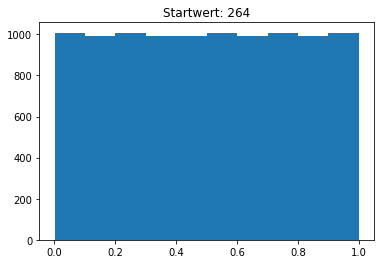

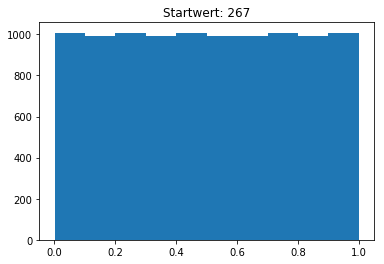

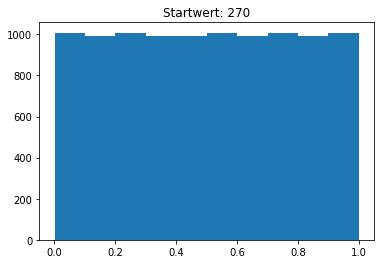

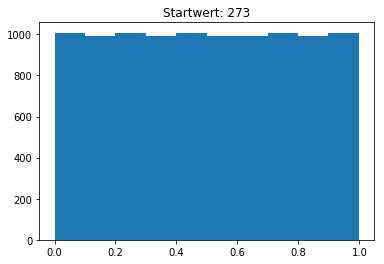

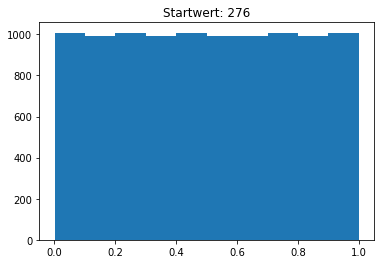

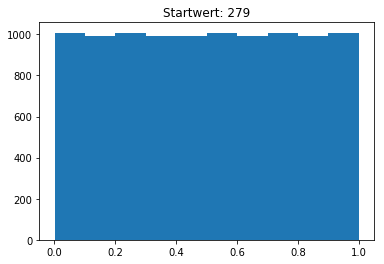

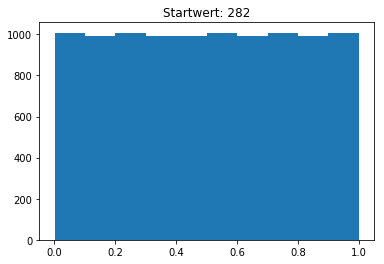

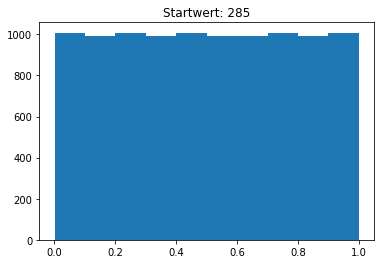

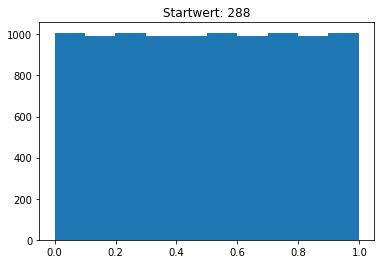

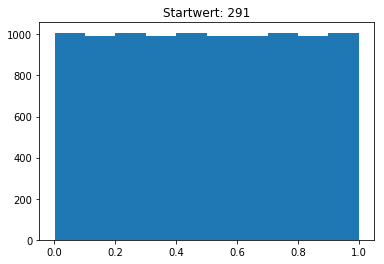

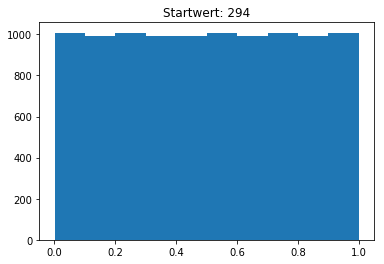

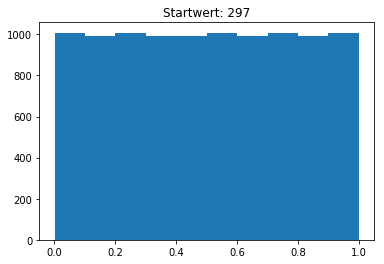

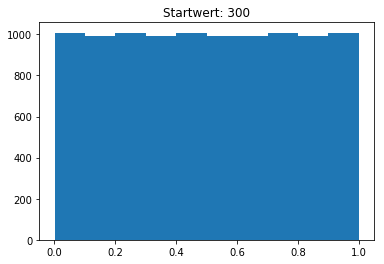

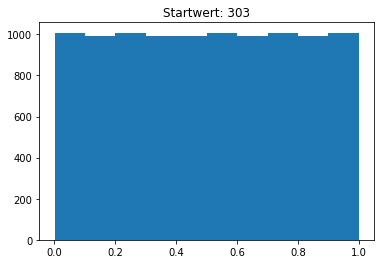

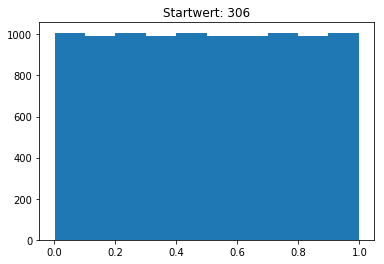

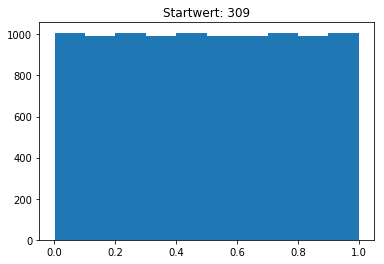

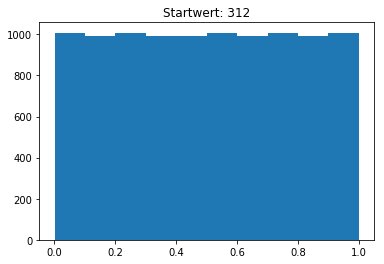

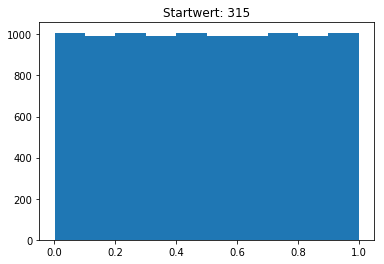

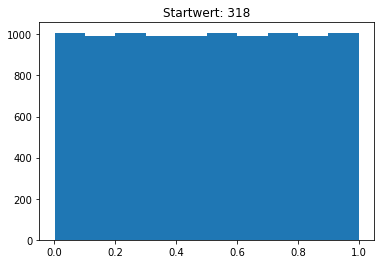

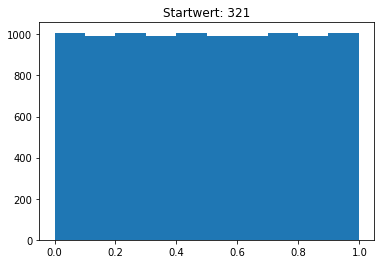

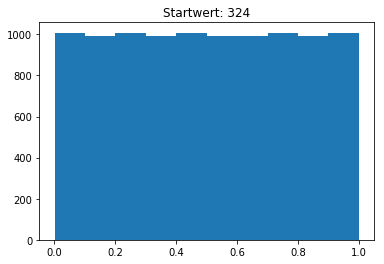

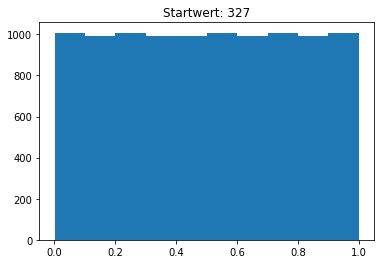

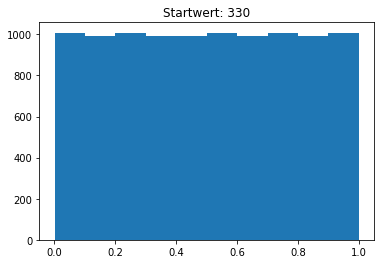

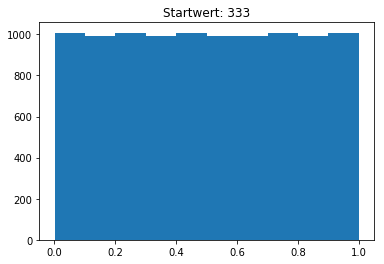

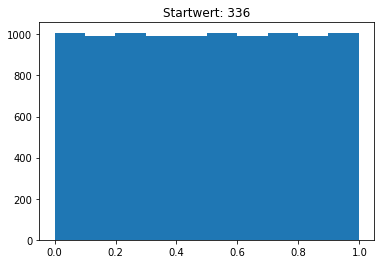

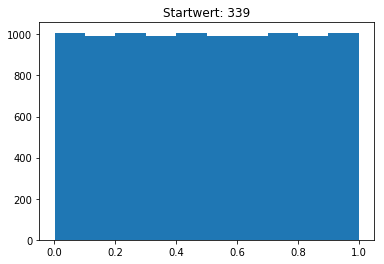

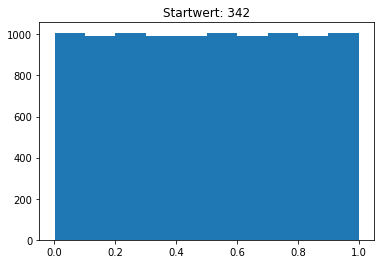

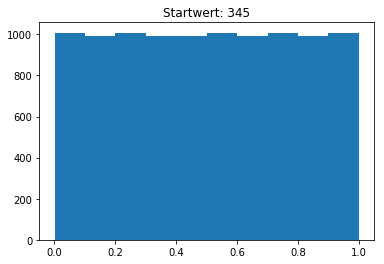

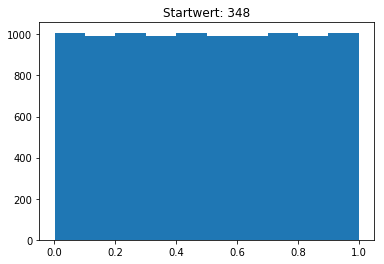

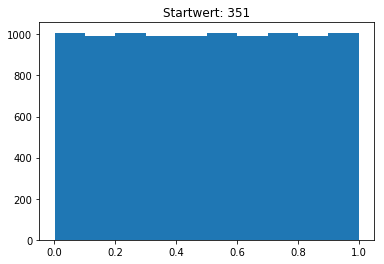

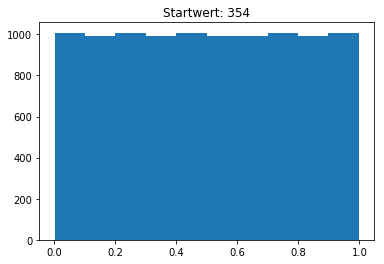

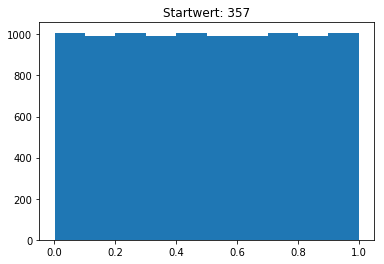

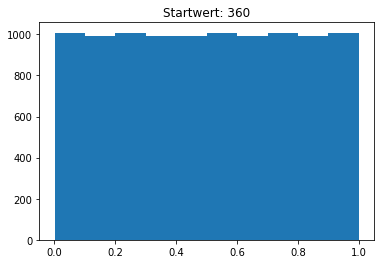

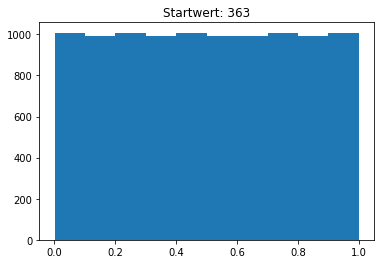

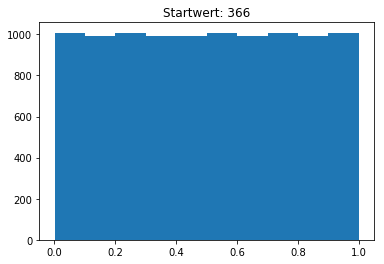

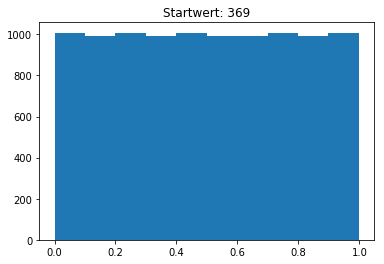

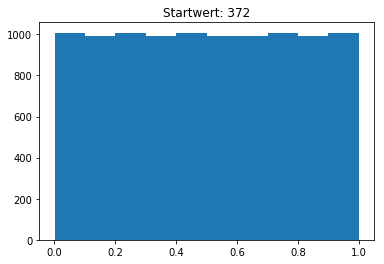

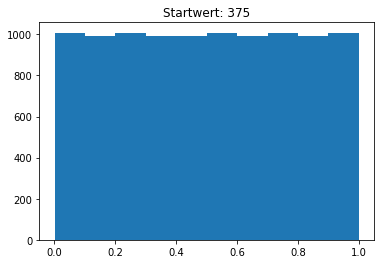

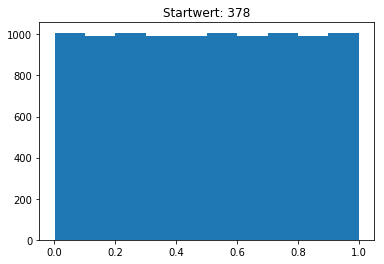

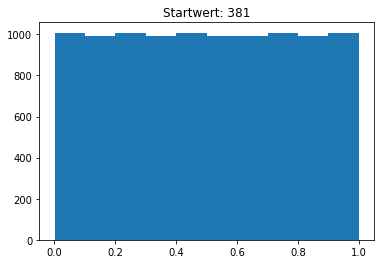

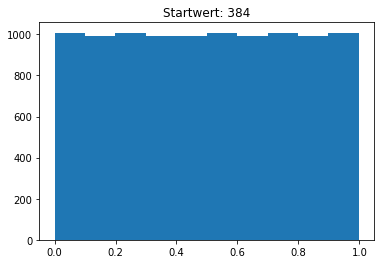

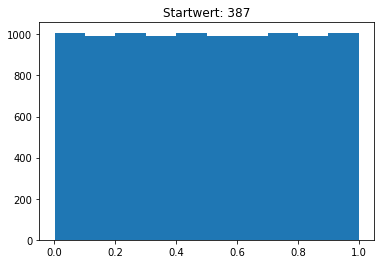

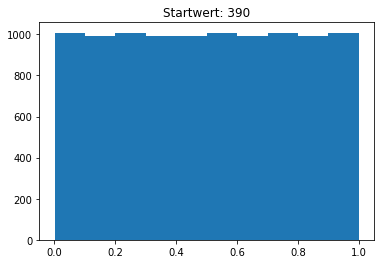

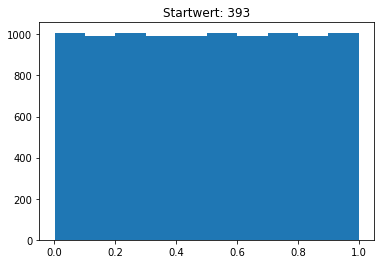

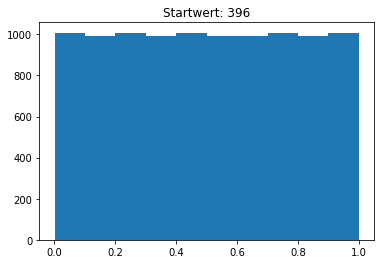

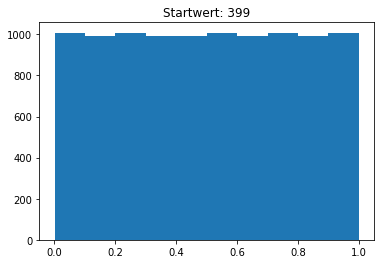

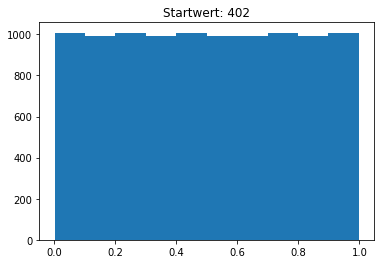

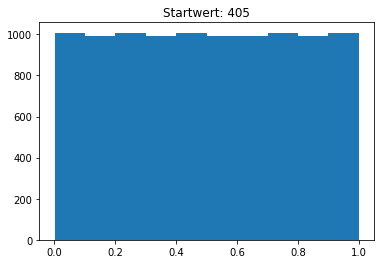

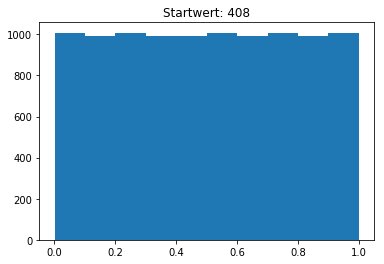

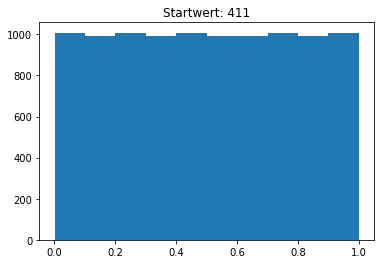

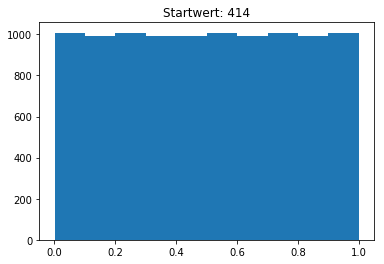

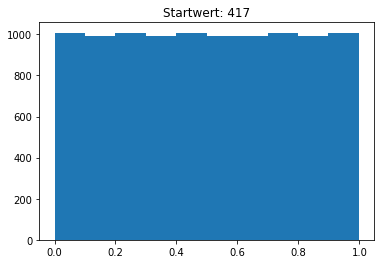

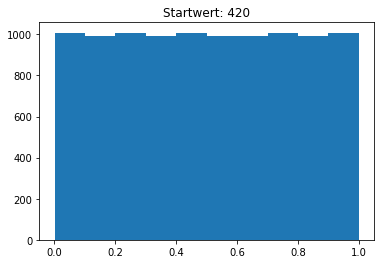

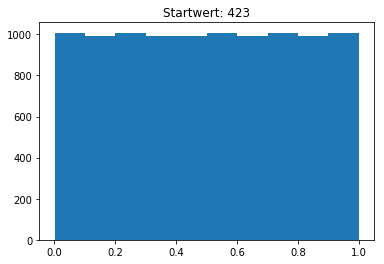

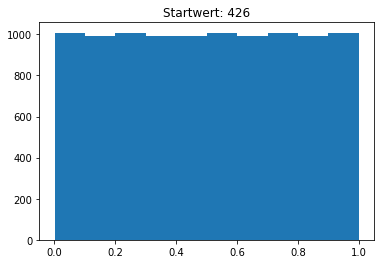

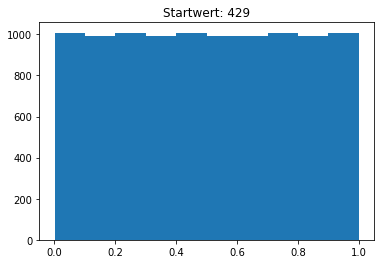

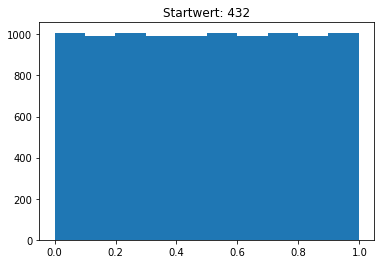

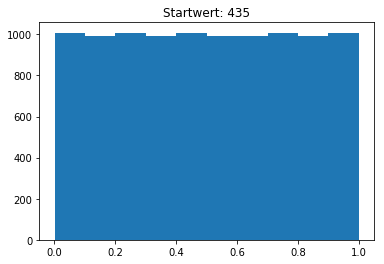

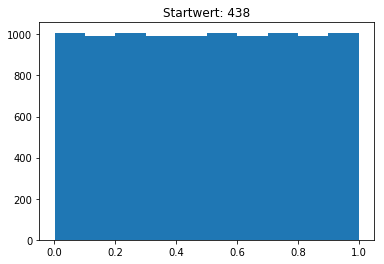

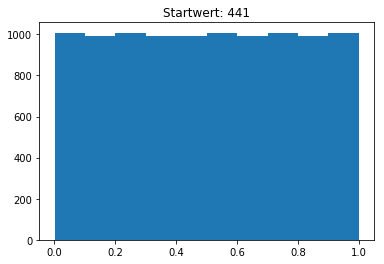

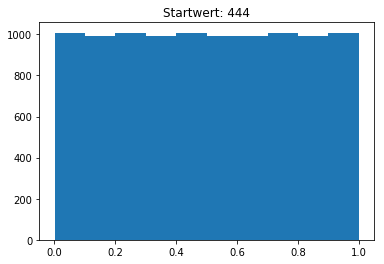

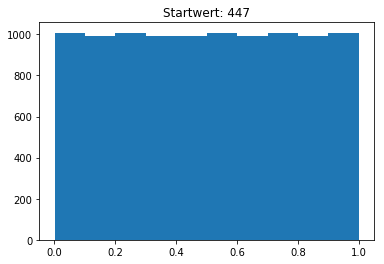

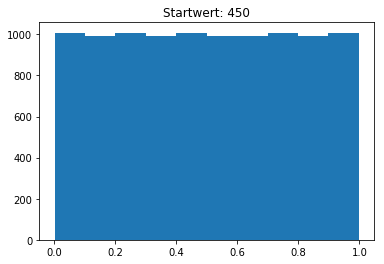

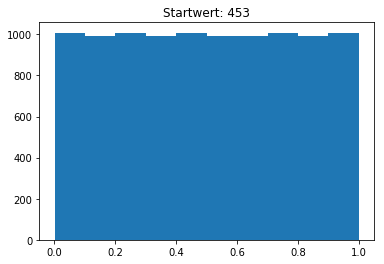

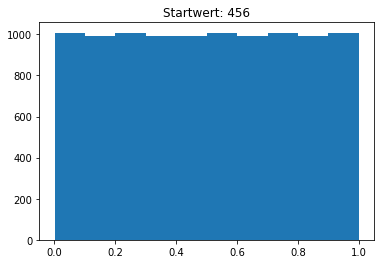

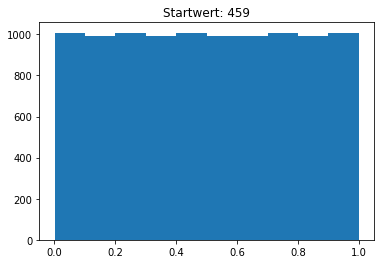

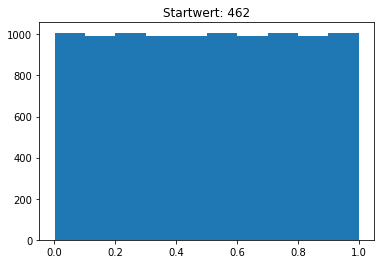

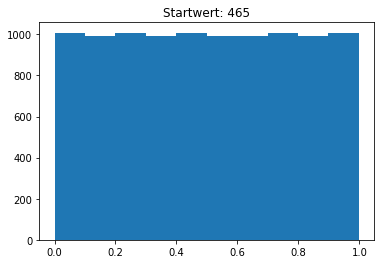

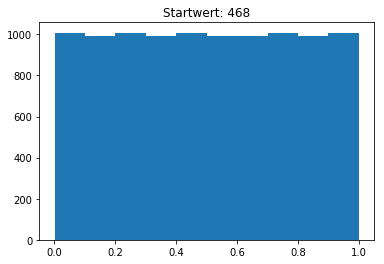

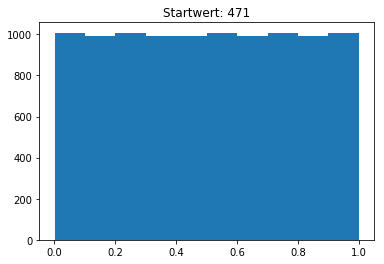

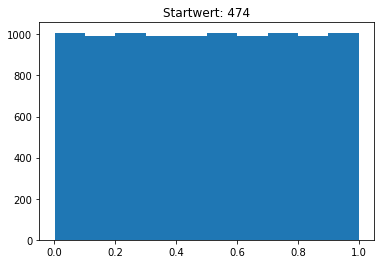

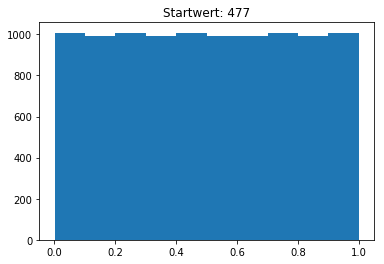

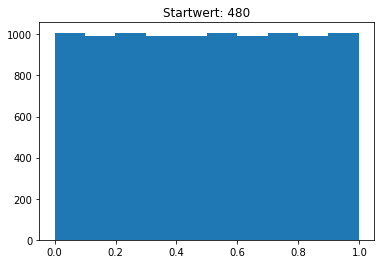

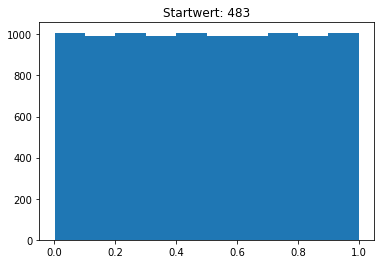

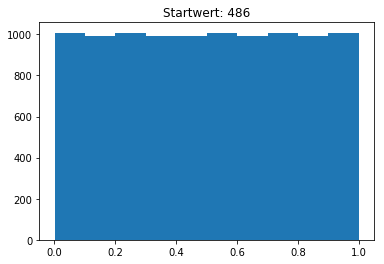

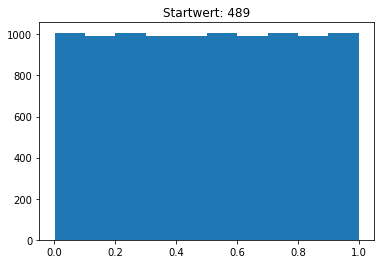

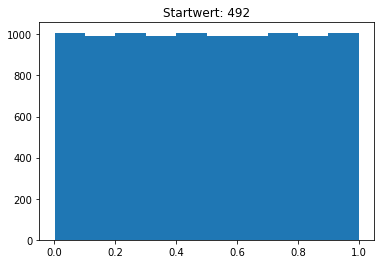

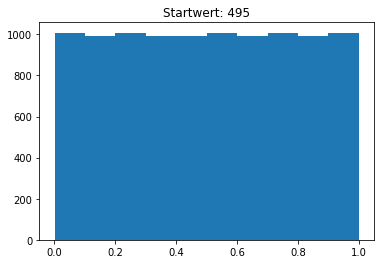

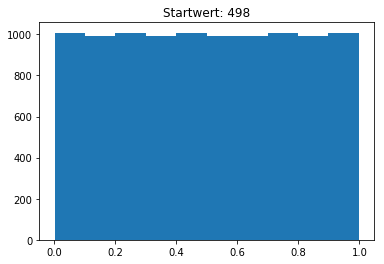

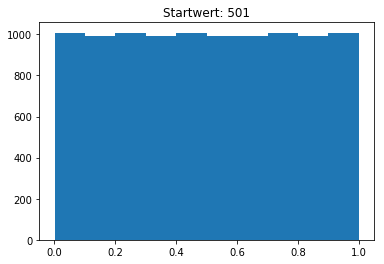

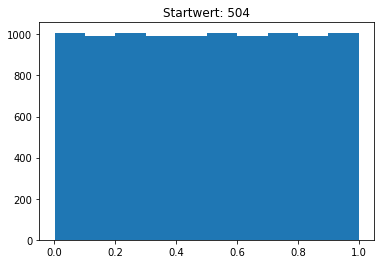

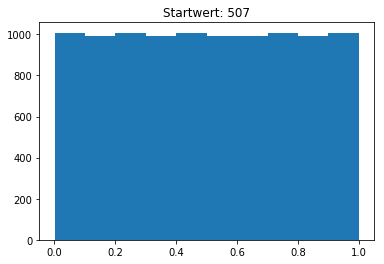

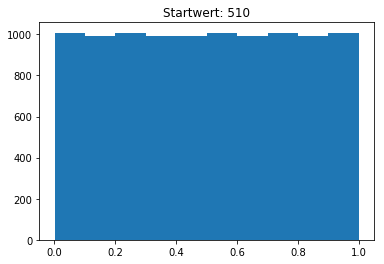

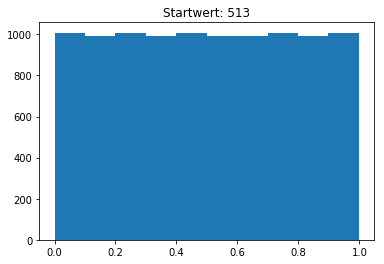

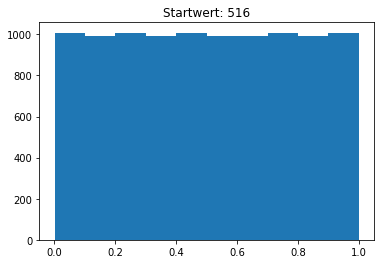

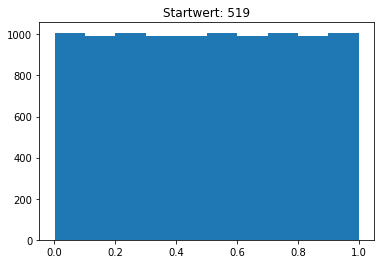

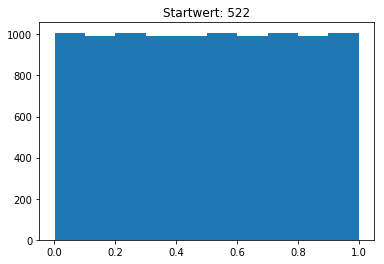

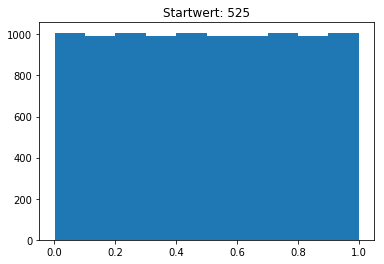

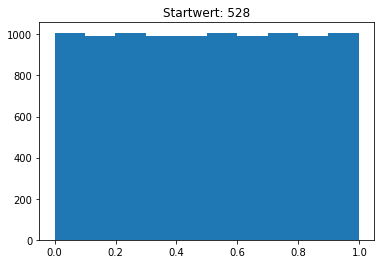

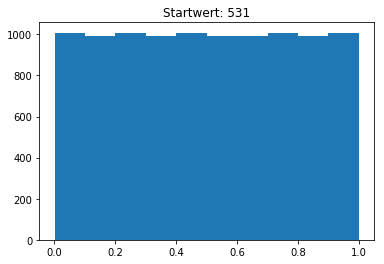

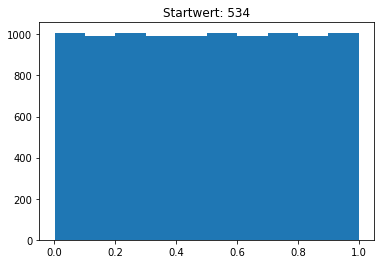

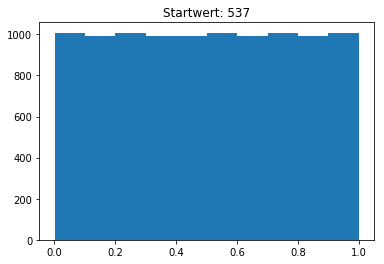

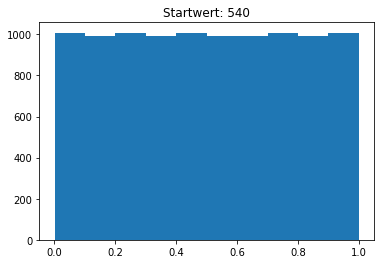

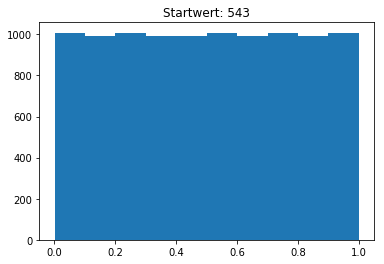

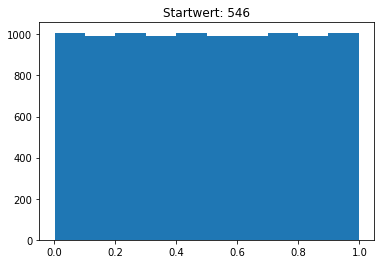

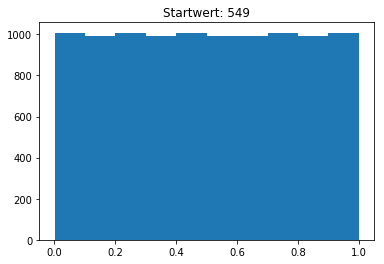

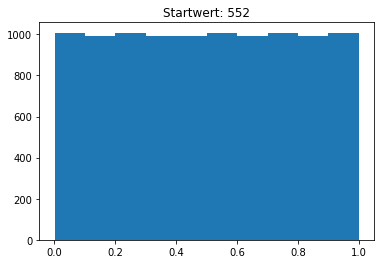

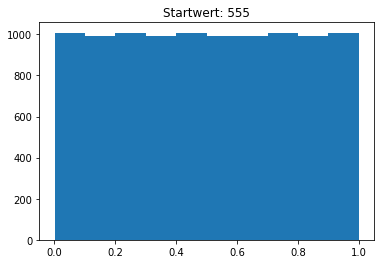

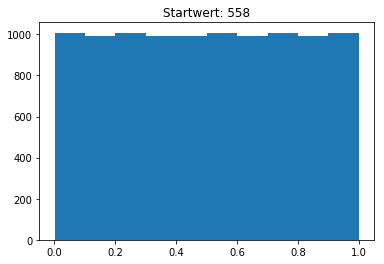

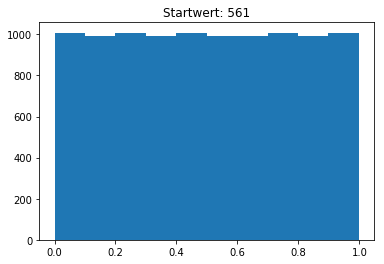

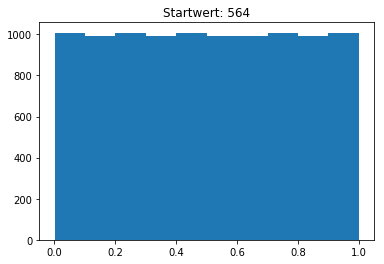

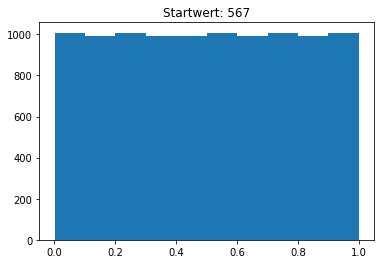

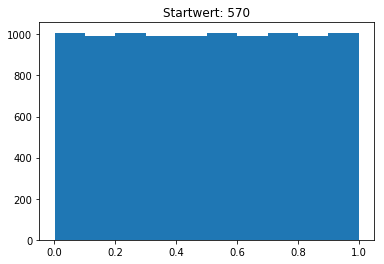

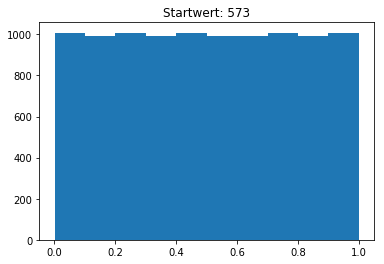

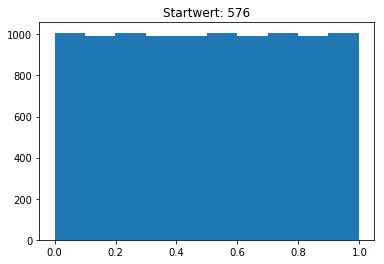

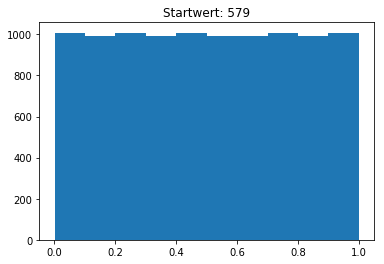

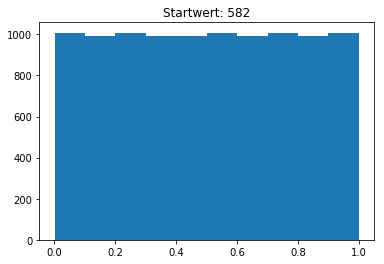

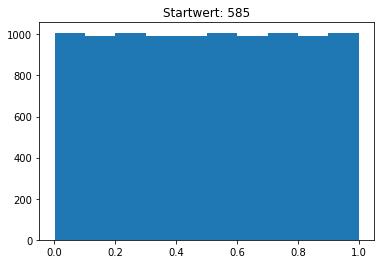

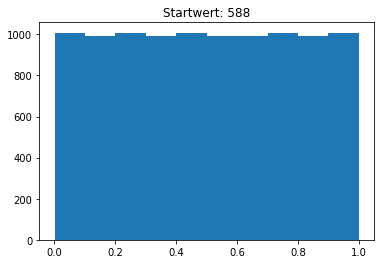

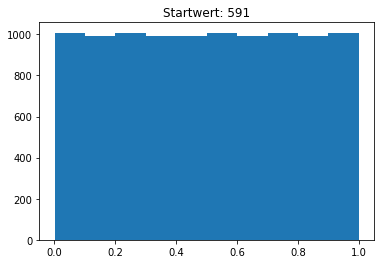

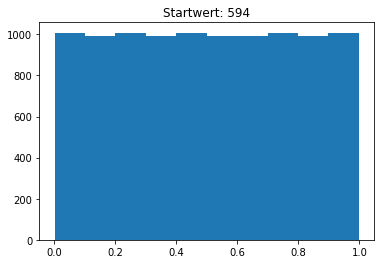

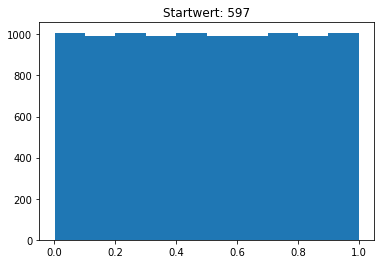

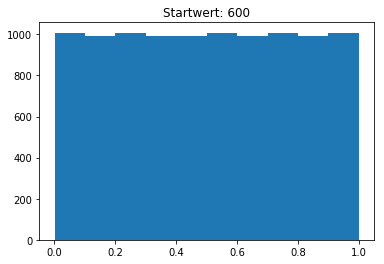

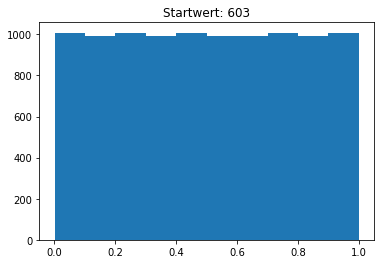

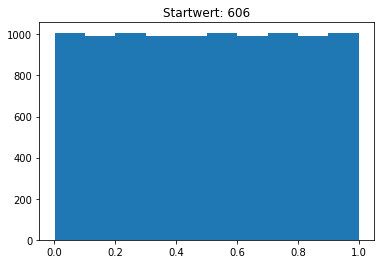

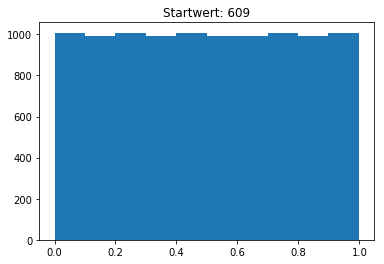

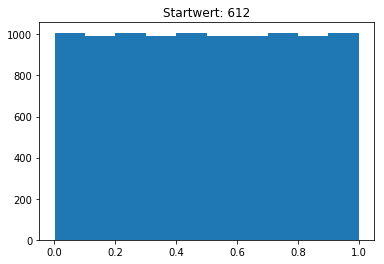

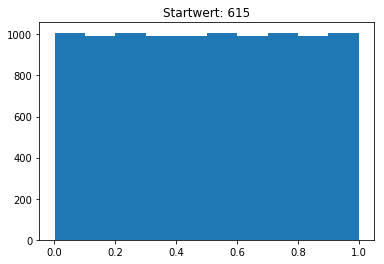

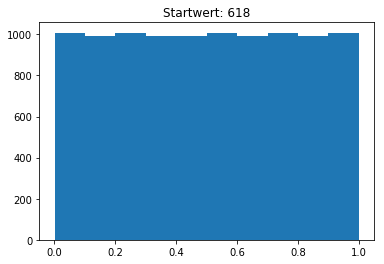

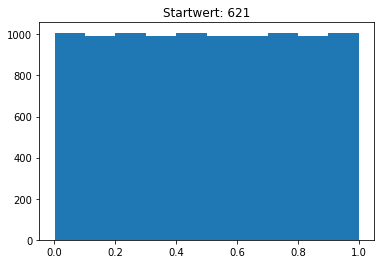

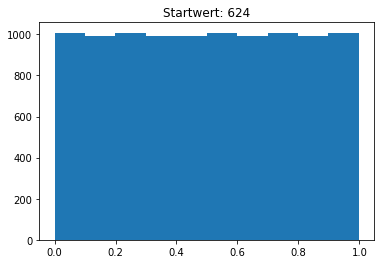

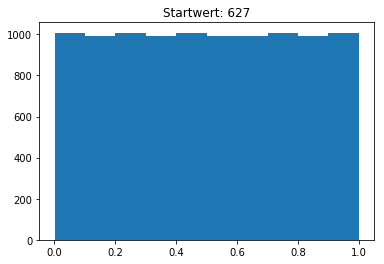

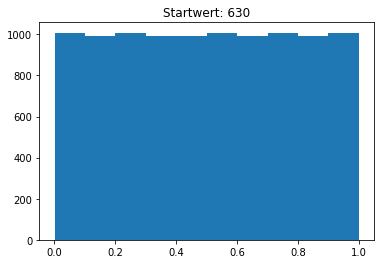

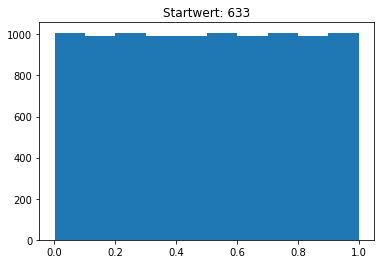

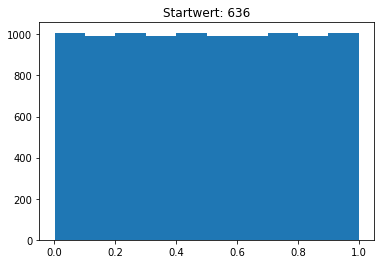

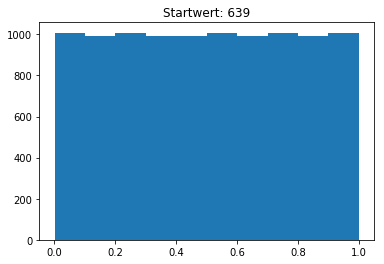

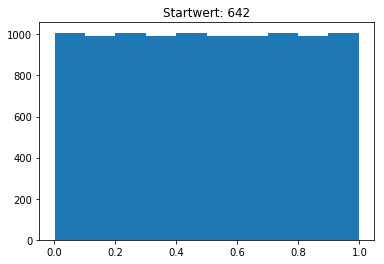

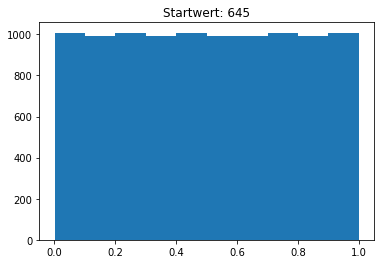

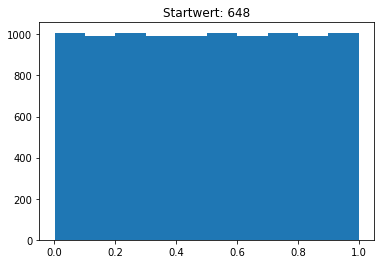

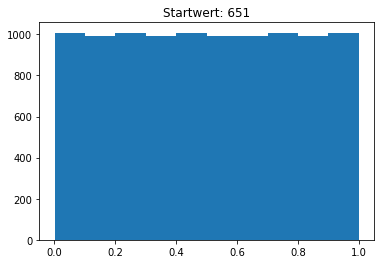

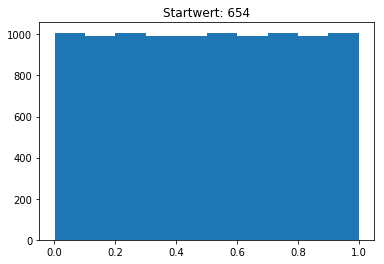

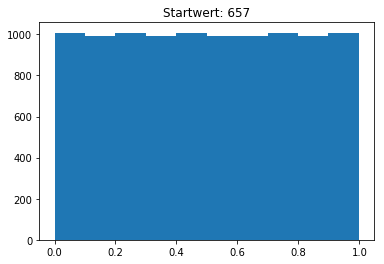

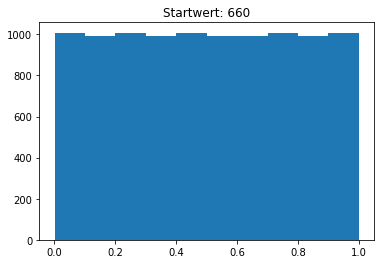

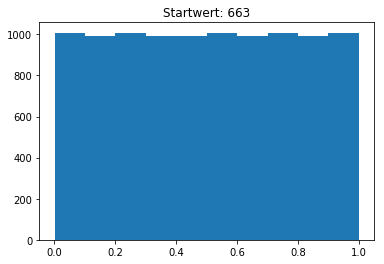

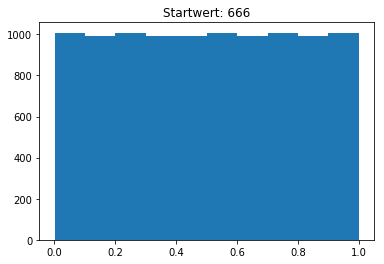

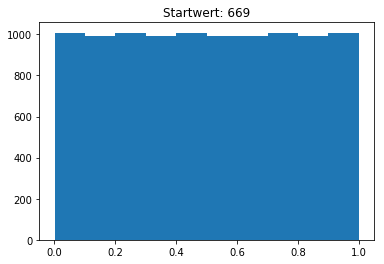

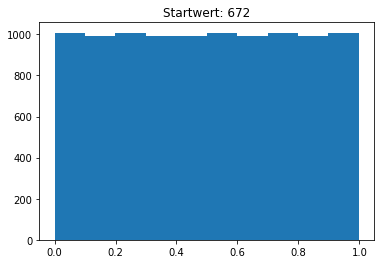

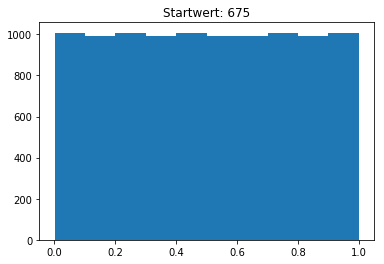

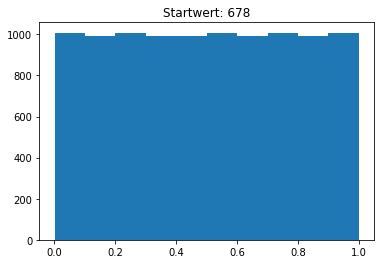

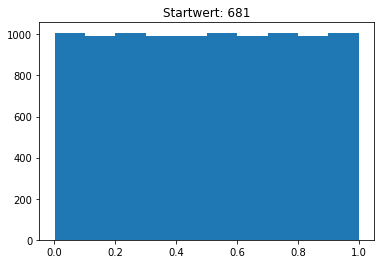

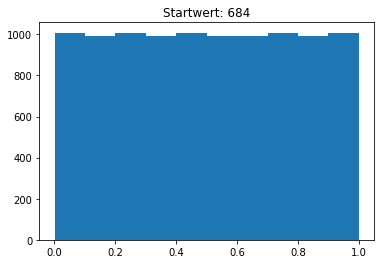

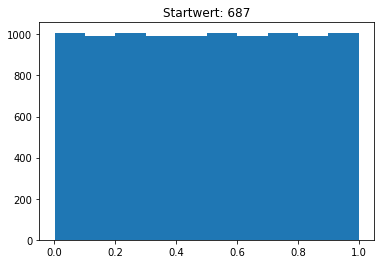

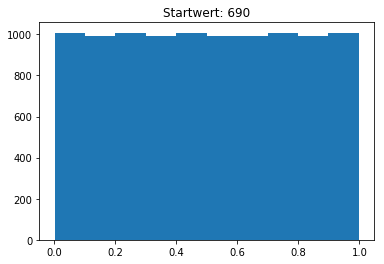

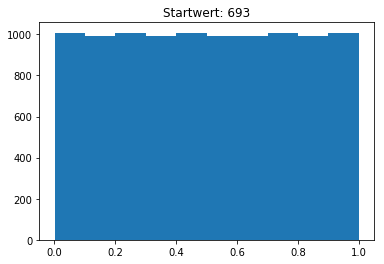

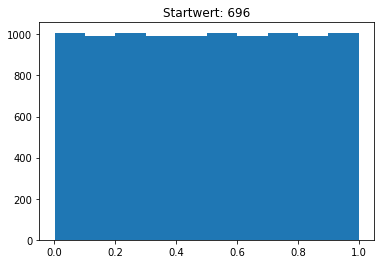

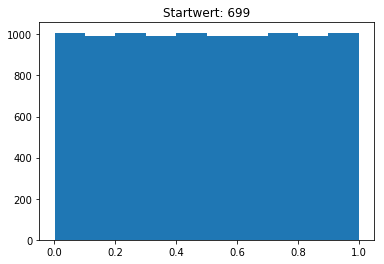

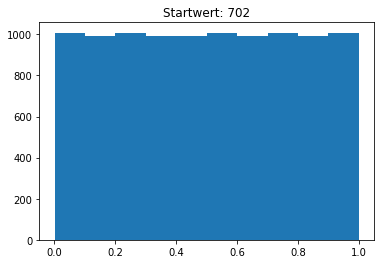

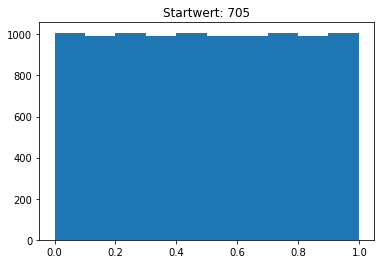

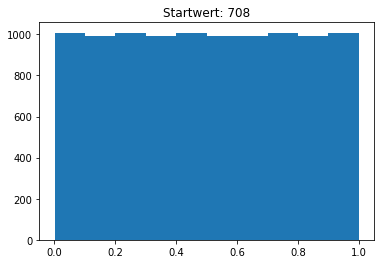

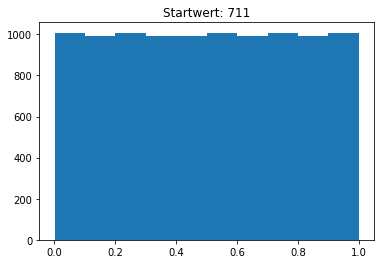

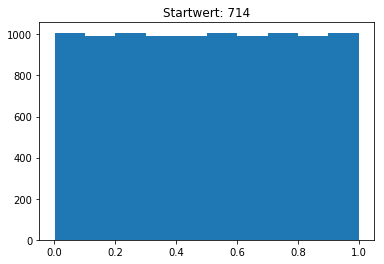

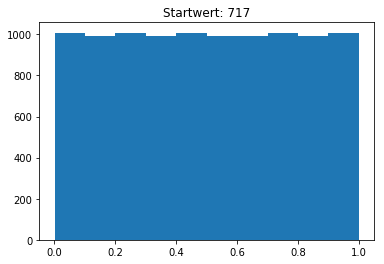

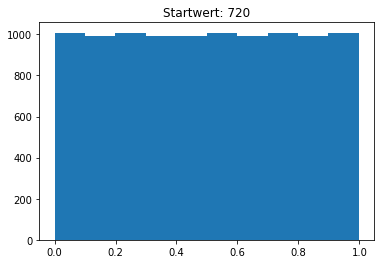

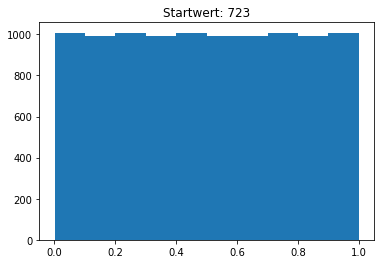

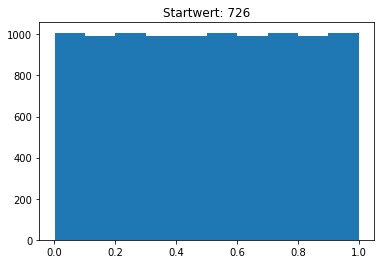

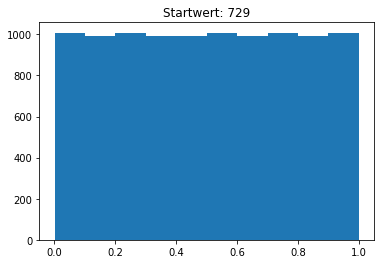

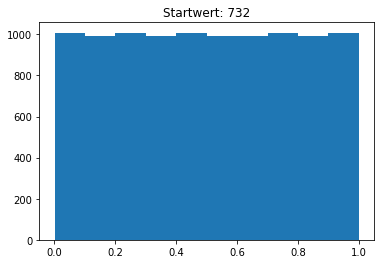

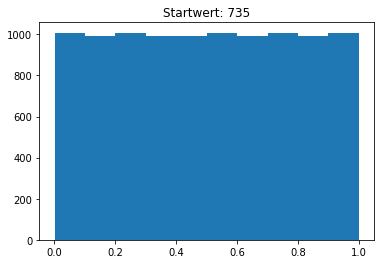

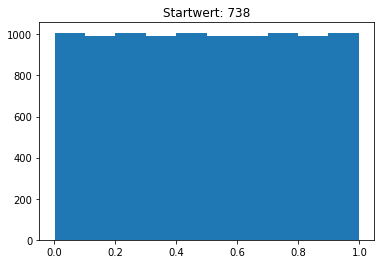

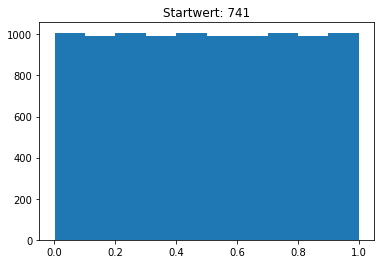

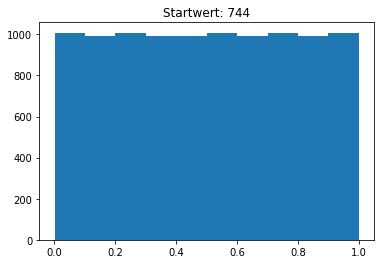

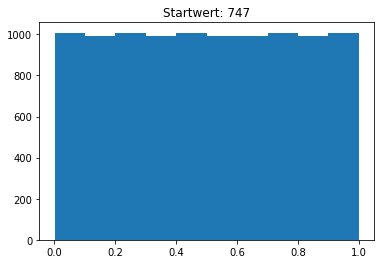

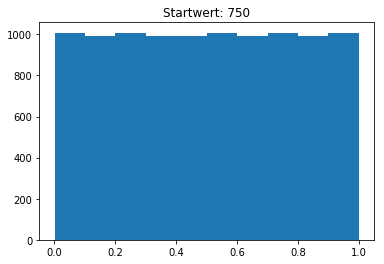

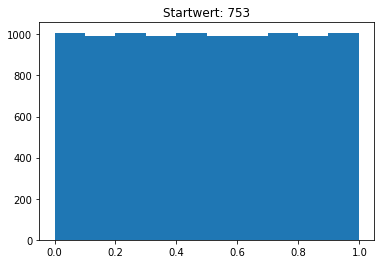

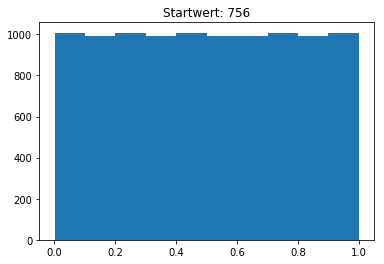

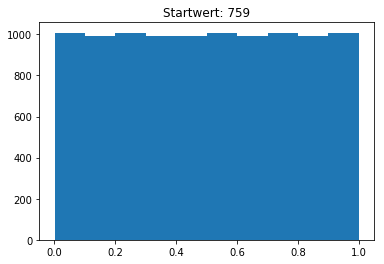

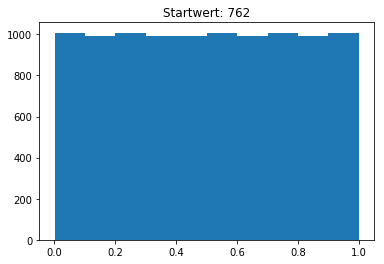

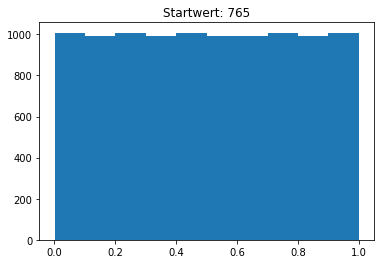

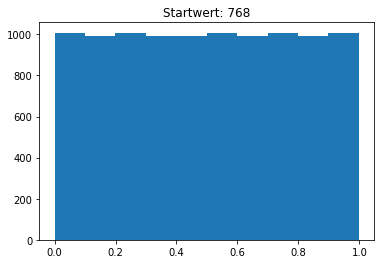

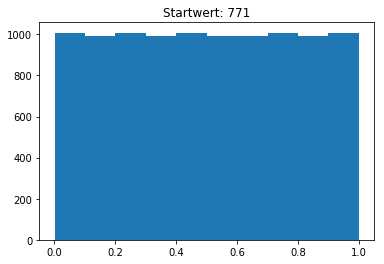

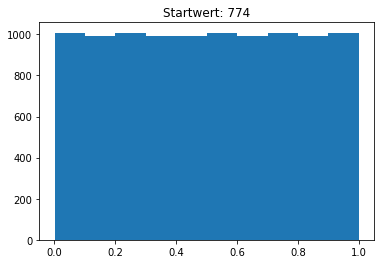

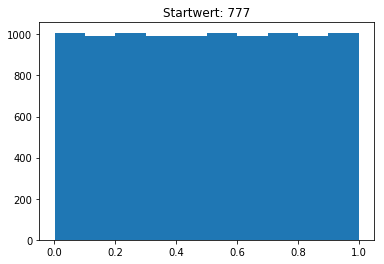

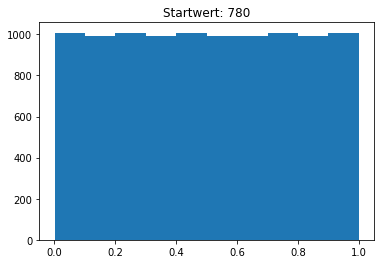

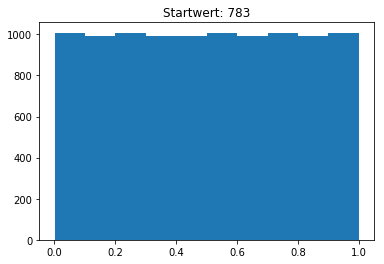

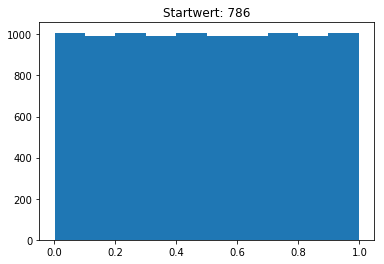

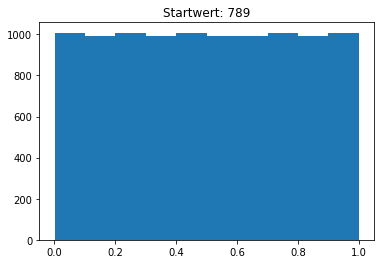

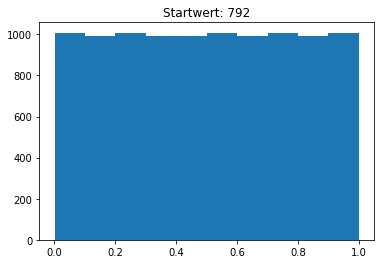

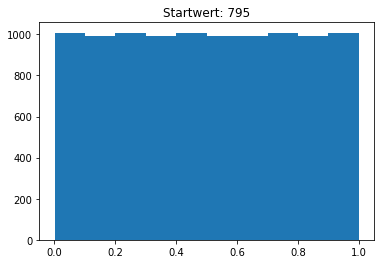

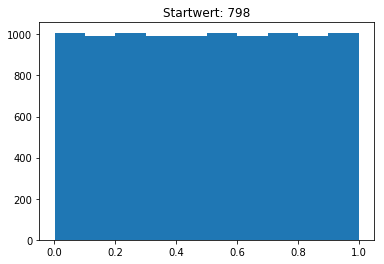

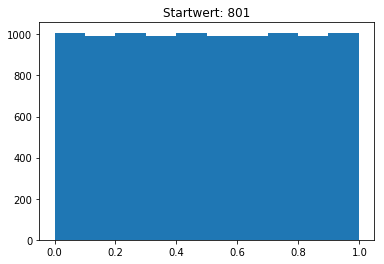

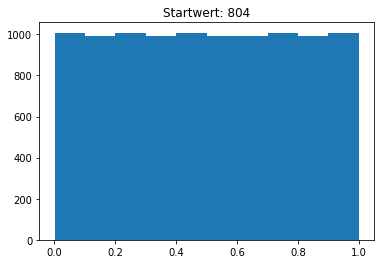

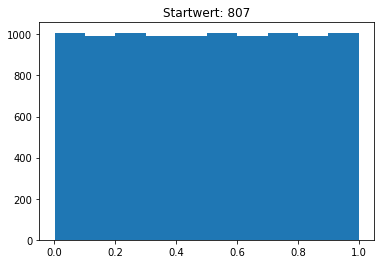

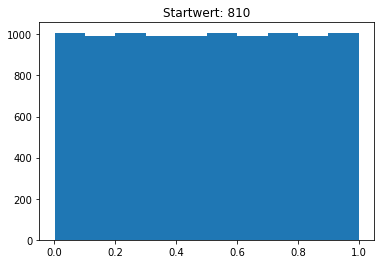

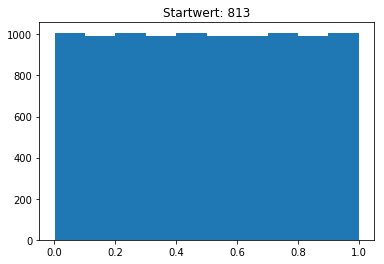

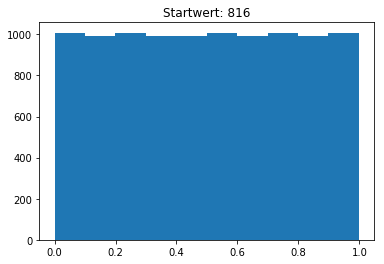

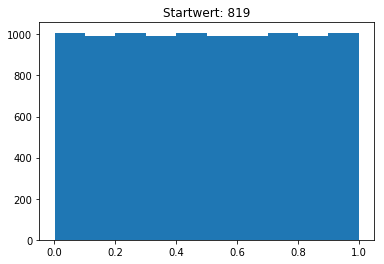

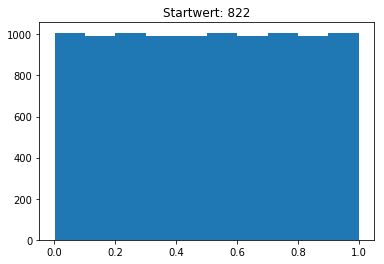

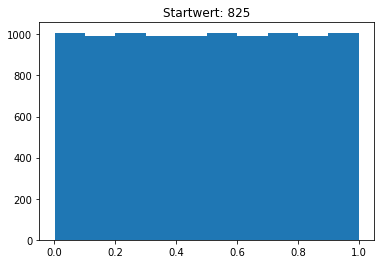

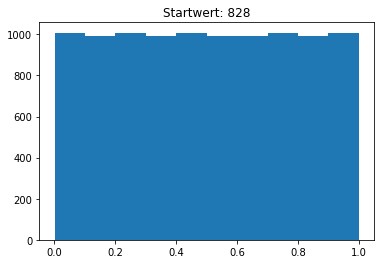

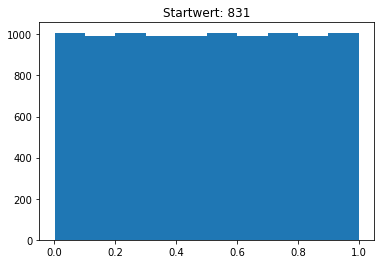

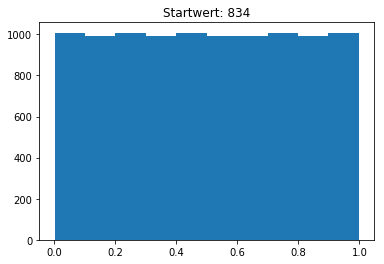

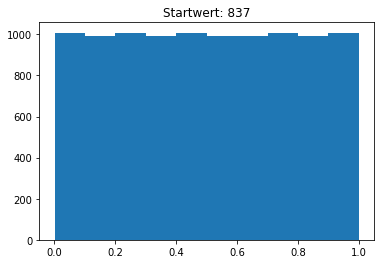

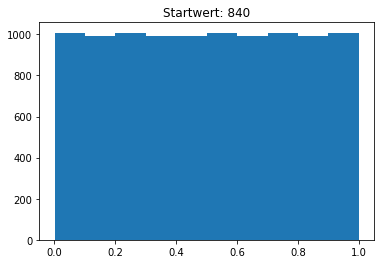

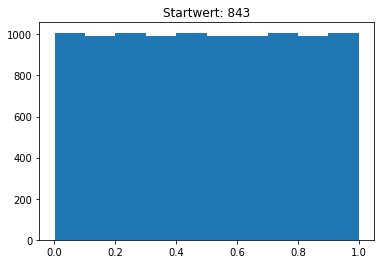

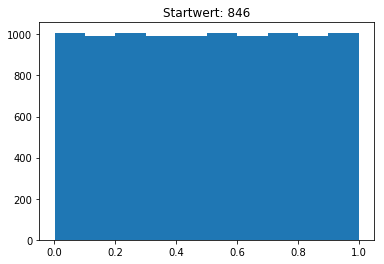

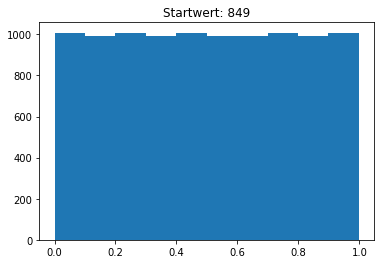

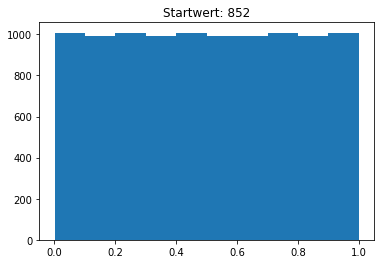

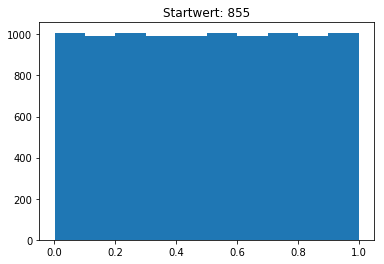

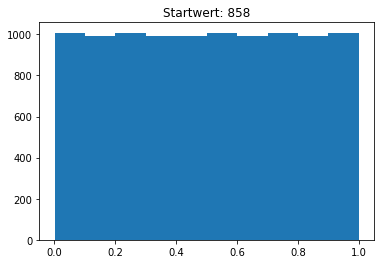

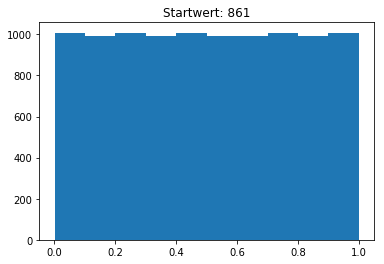

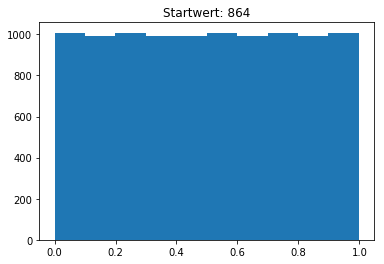

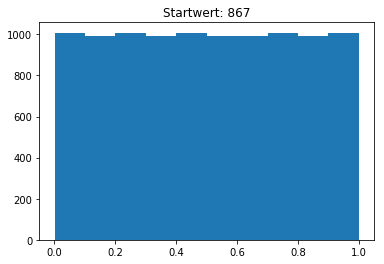

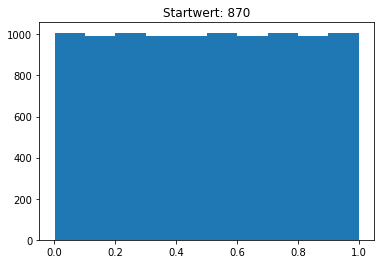

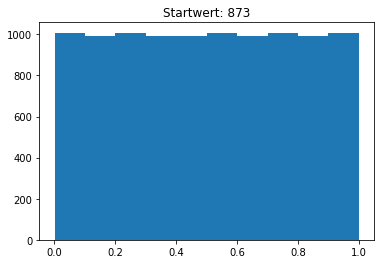

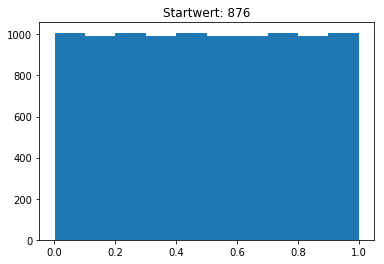

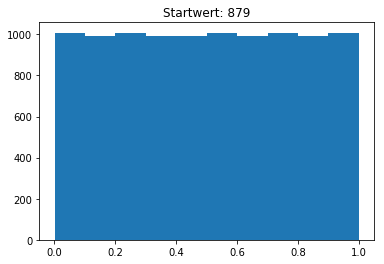

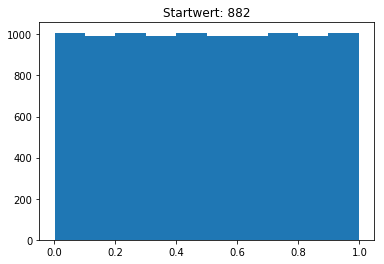

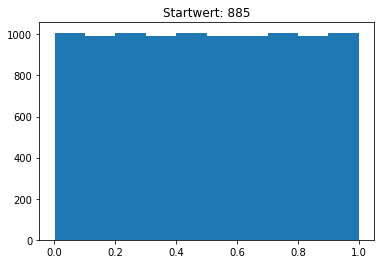

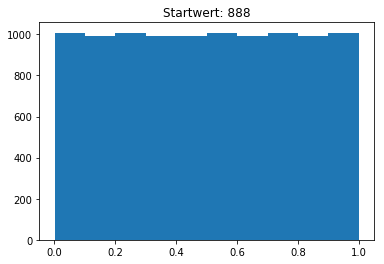

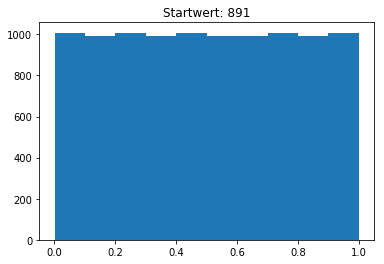

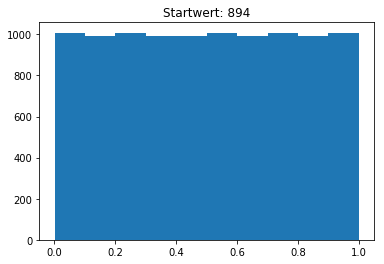

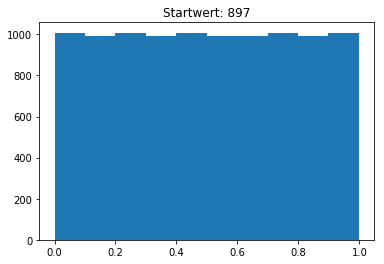

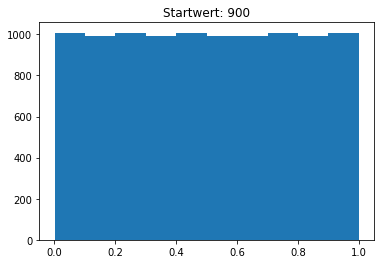

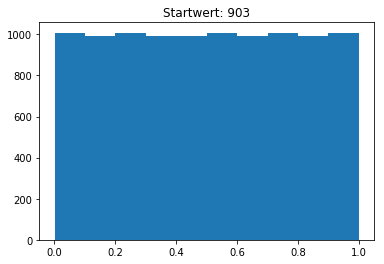

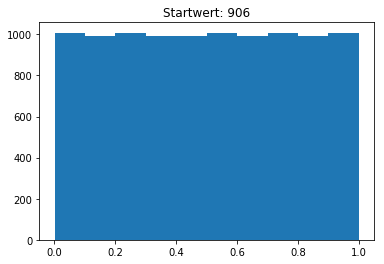

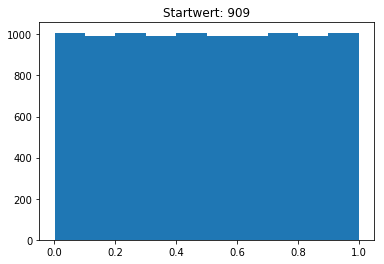

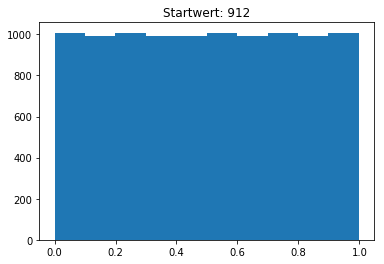

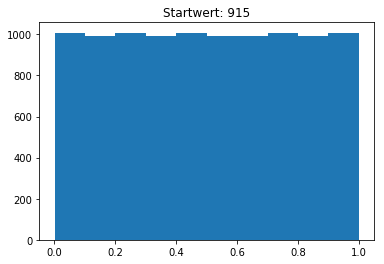

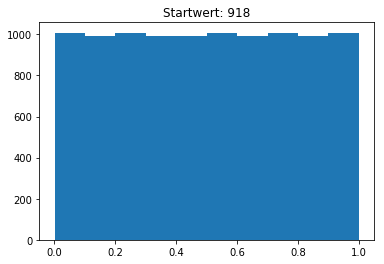

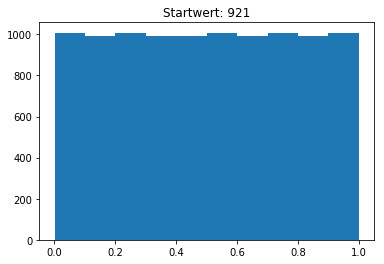

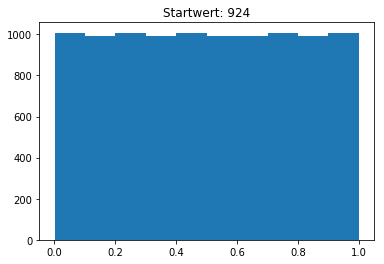

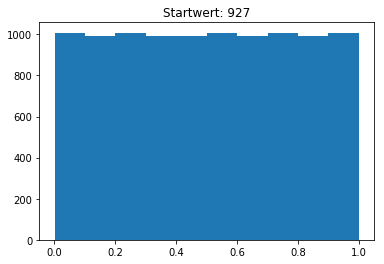

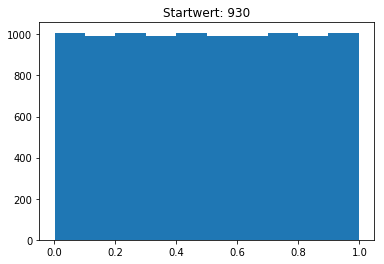

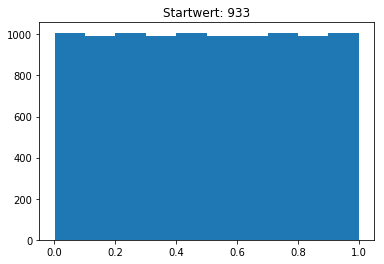

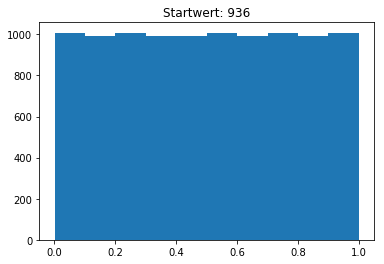

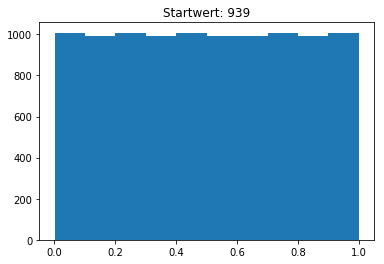

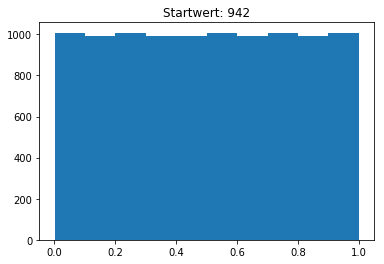

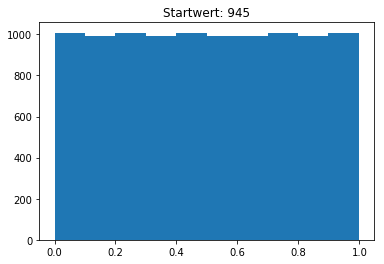

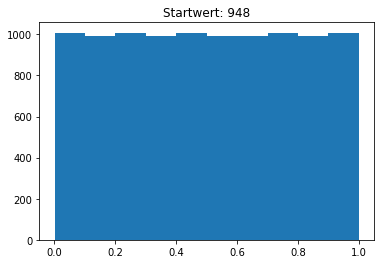

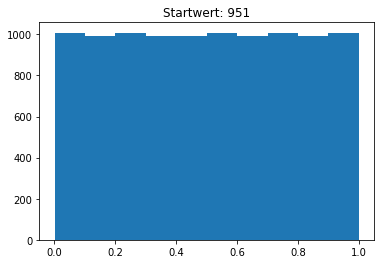

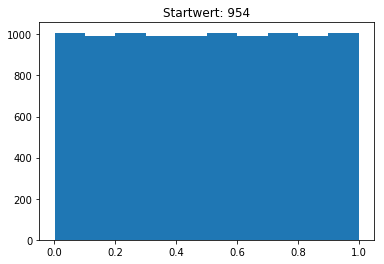

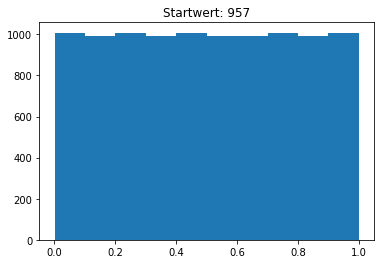

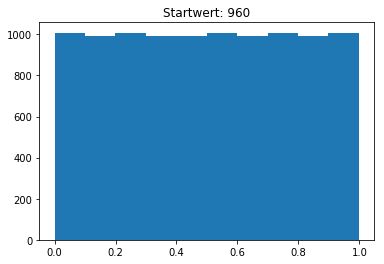

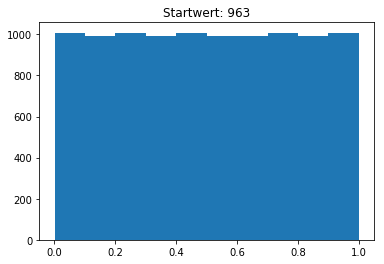

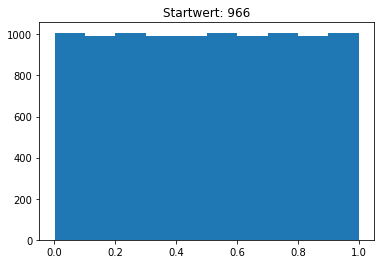

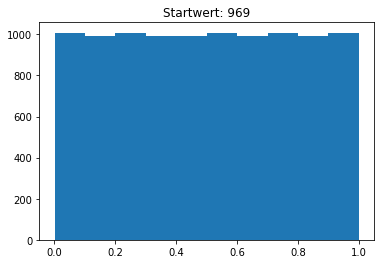

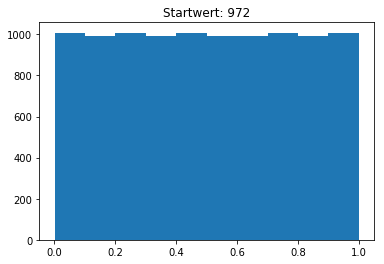

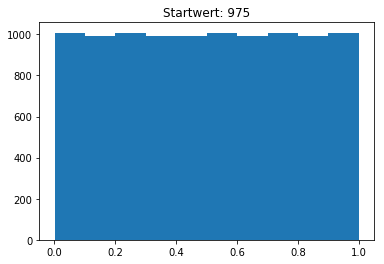

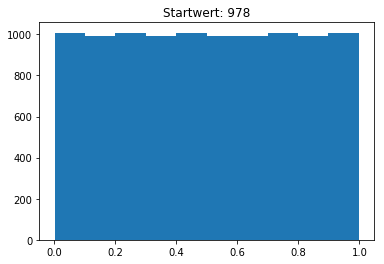

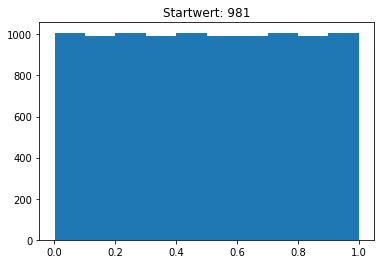

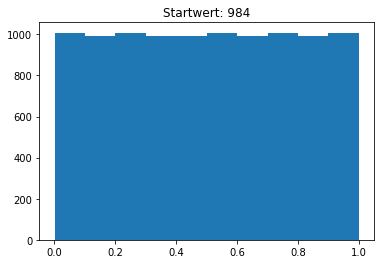

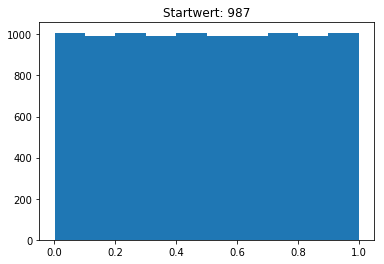

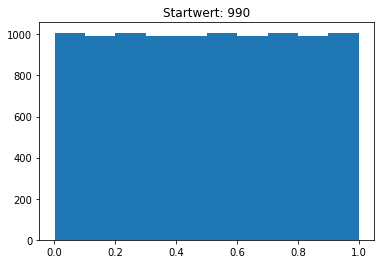

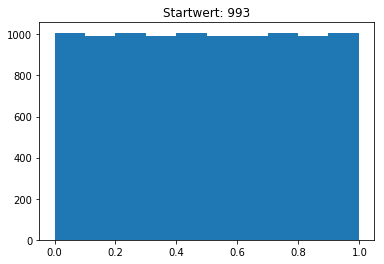

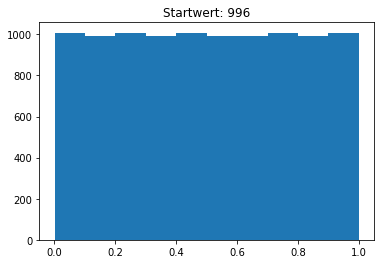

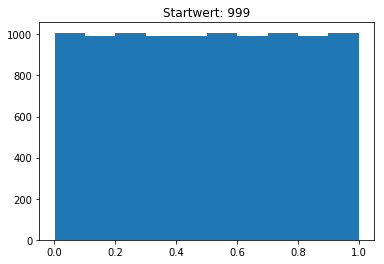

In [27]:
for i in range(0,1000,3):
    random_numbers = LCG(1e4, i, a, b, m, True, False)
    plt.hist(random_numbers)
    plt.title(f'Startwert: {i}')
    plt.show()

Das Resultat hängt kaum von dem Startwert ab, lediglich die Orte der Maxima ändern sich.
Da dies zufällig geschieht ist das gut.

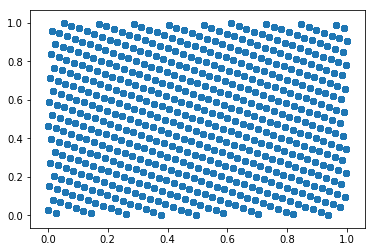

In [28]:
plt.scatter(random_numbers[0:-1:1], random_numbers[1::1])

Dies entspricht keinem guten Zufallszahlengenerator, weil zwei gleichverteilte Zufallszahlen auch wieder einer gleichverteilten Zufallszahl entsprechen sollten. In der obigen Abbildung ekennt man deutlich Ebenenen, was auf eine ungleichverteilte Menge von Zahlen schließen lässt.

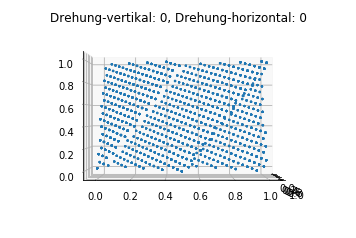

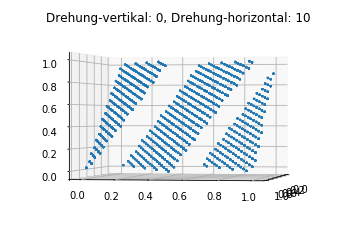

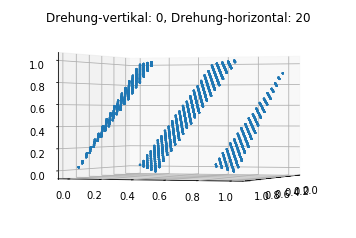

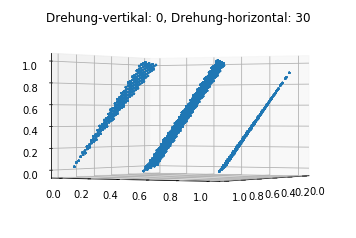

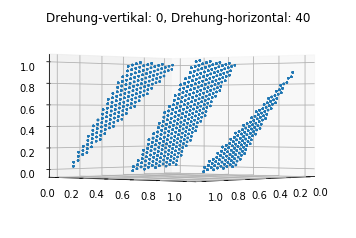

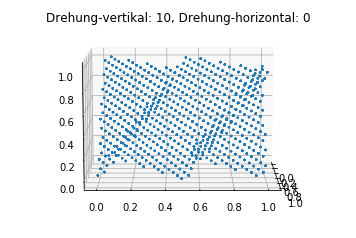

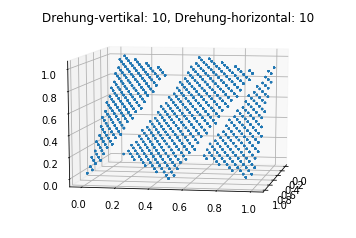

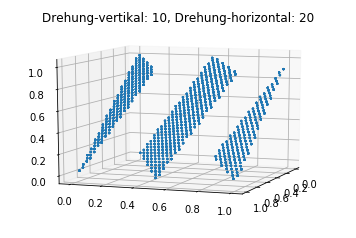

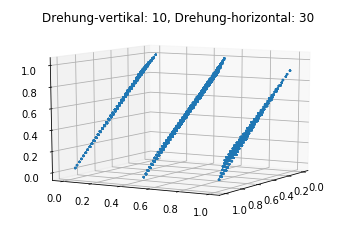

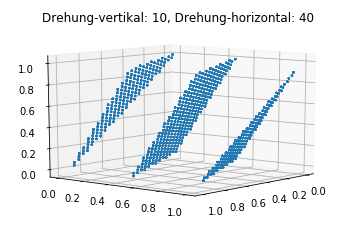

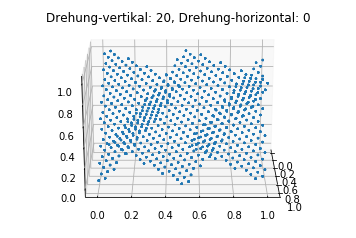

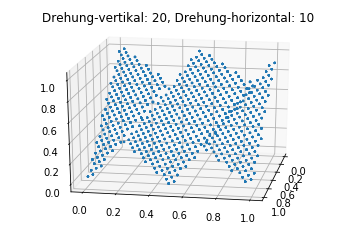

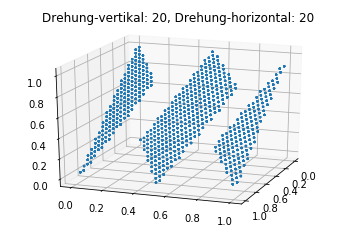

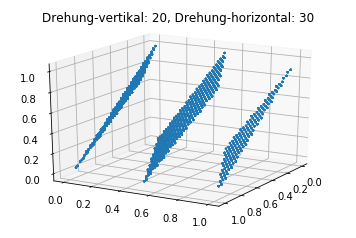

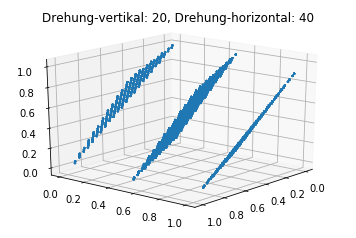

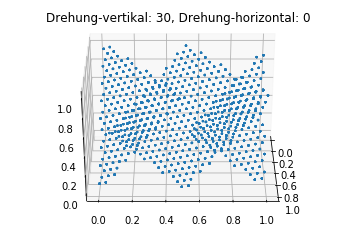

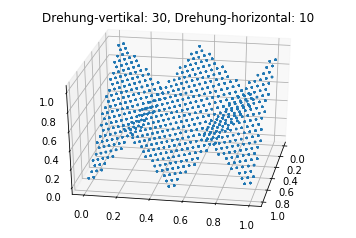

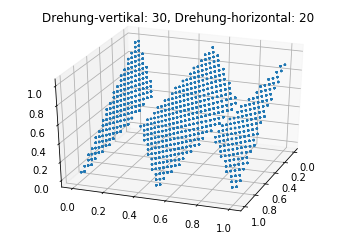

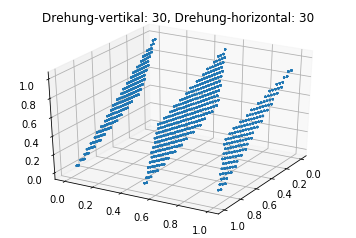

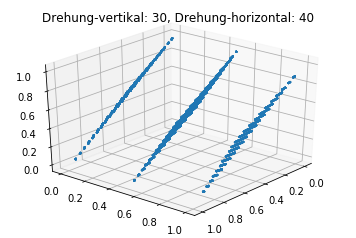

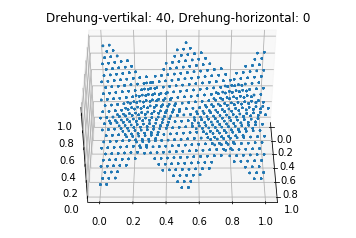

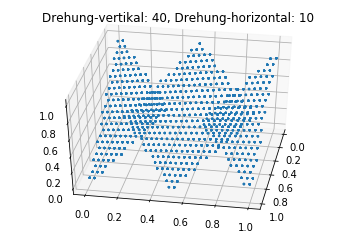

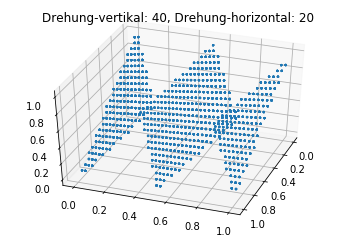

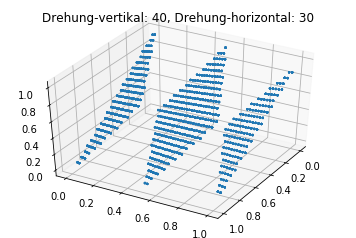

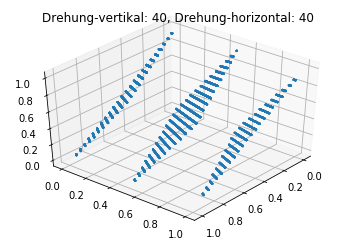

In [29]:
from mpl_toolkits.mplot3d import Axes3D
for i in range(0,45,10):
    for j in range(0,45,10):
        fig = plt.figure()
        ax = fig. add_subplot (111 , projection ='3d')
        ax.view_init(i, j) 
        ax.scatter(random_numbers[0:-2:1], random_numbers[1:-1:1], random_numbers[2::1], lw=0, s=5)
        plt.title(f'Drehung-vertikal: {i}, Drehung-horizontal: {j}')
        plt.show()

In der dreidimensionalen Darstellung erkennt man die Ungleichmäßige Verteilung noch besser.

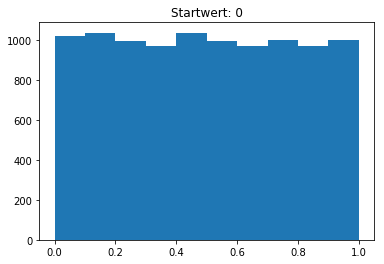

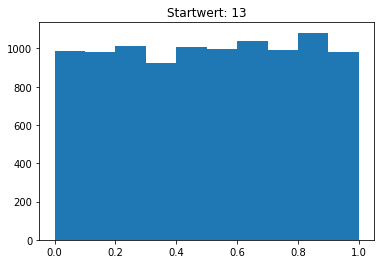

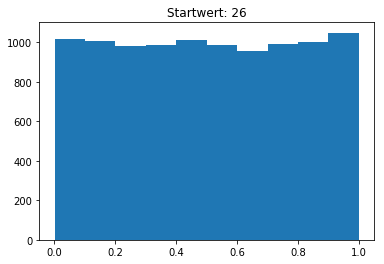

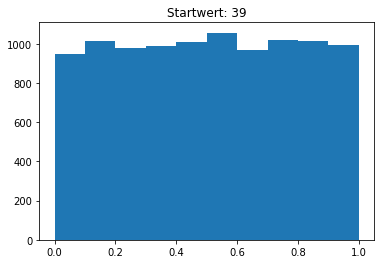

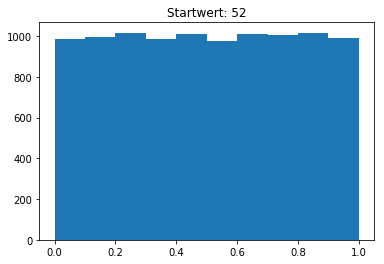

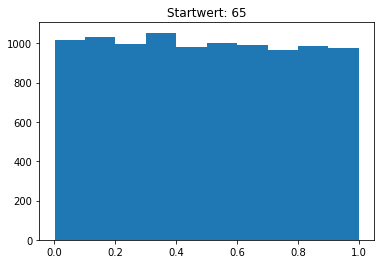

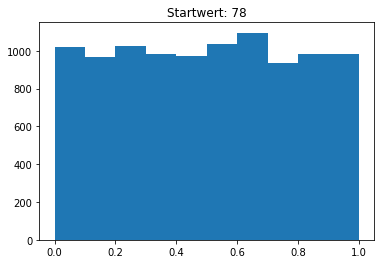

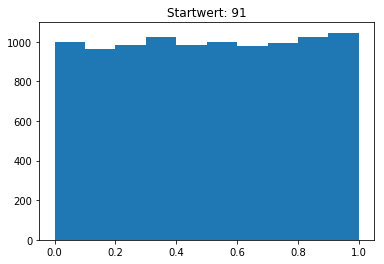

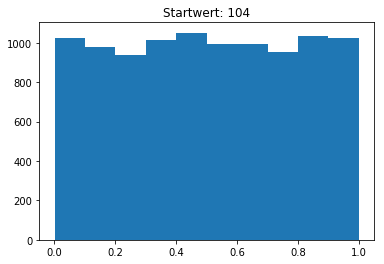

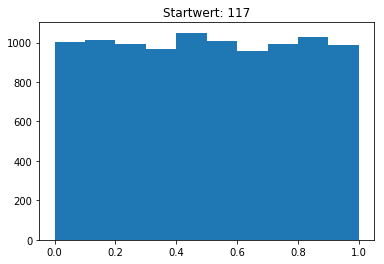

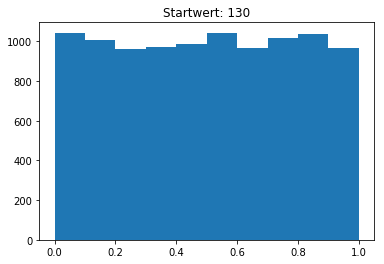

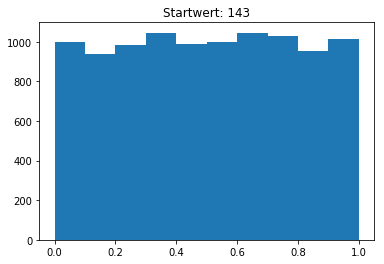

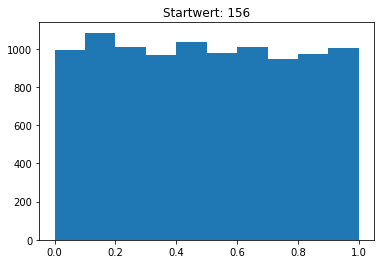

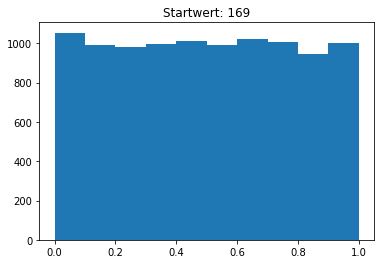

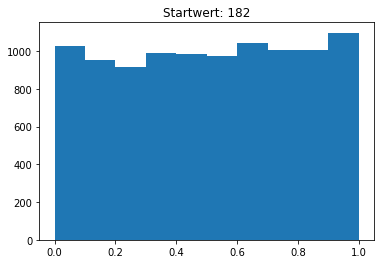

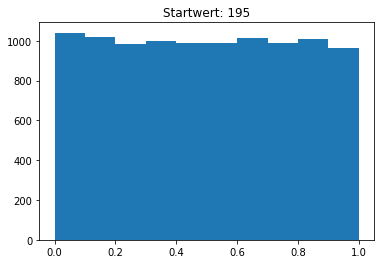

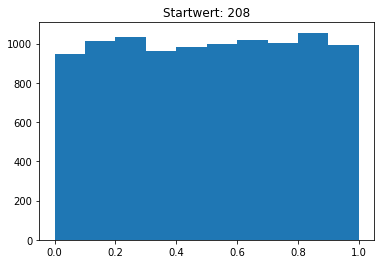

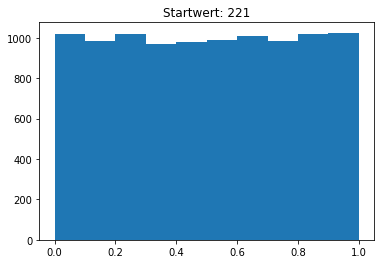

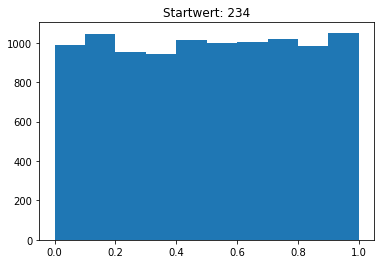

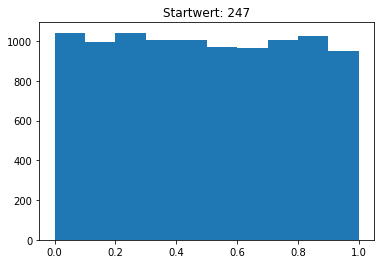

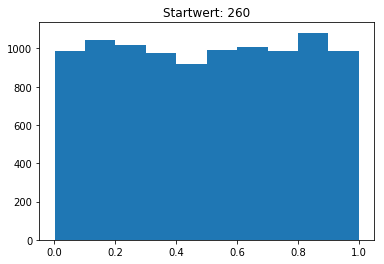

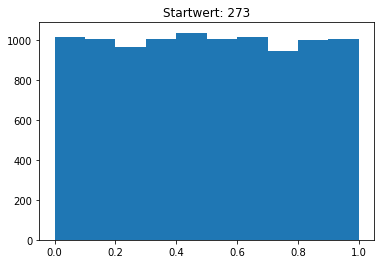

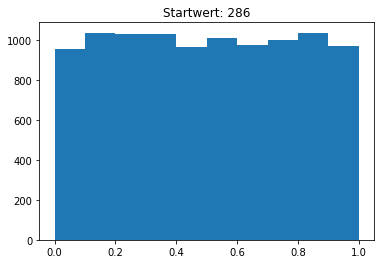

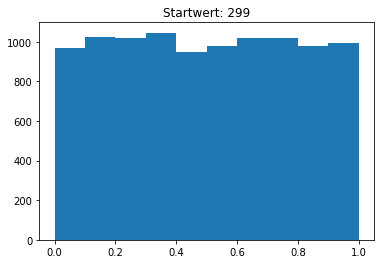

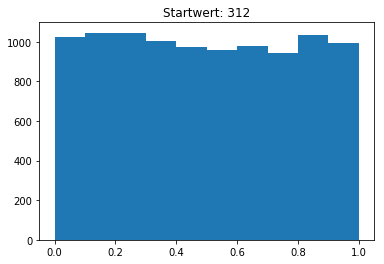

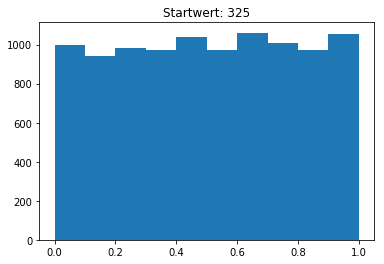

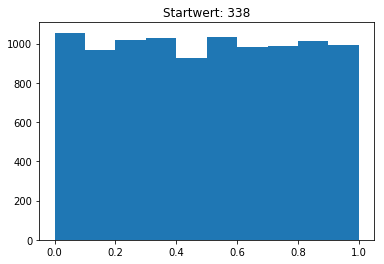

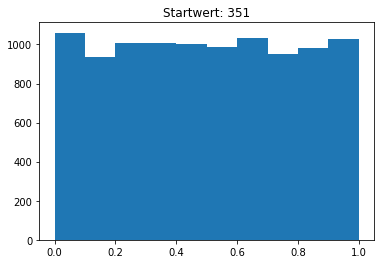

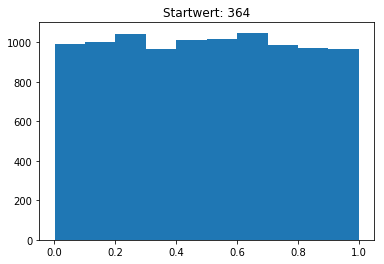

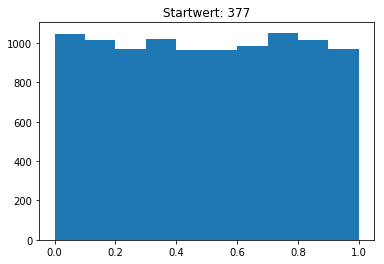

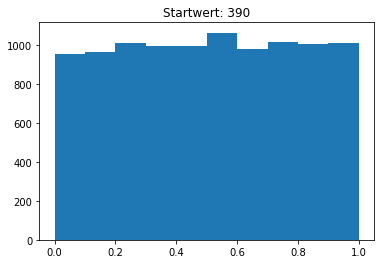

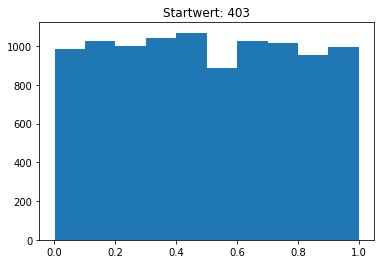

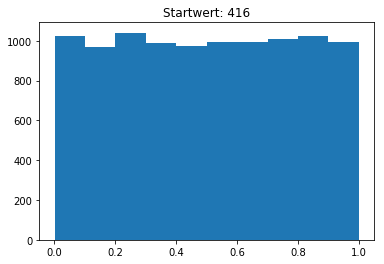

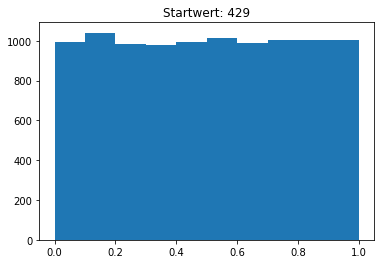

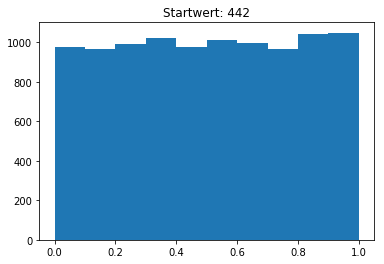

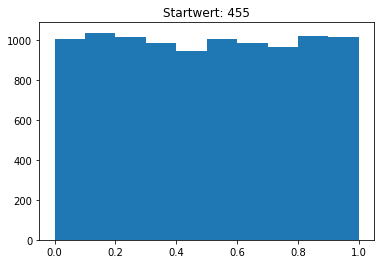

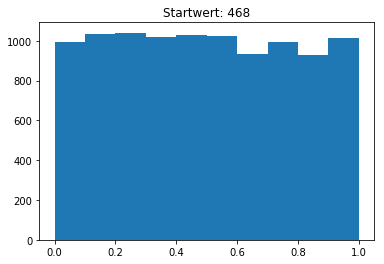

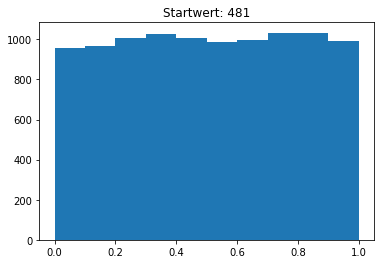

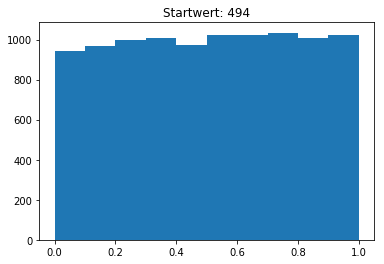

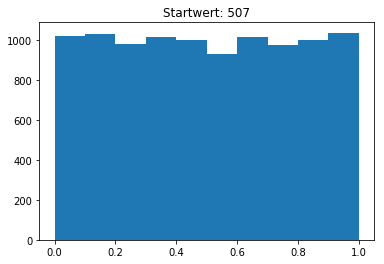

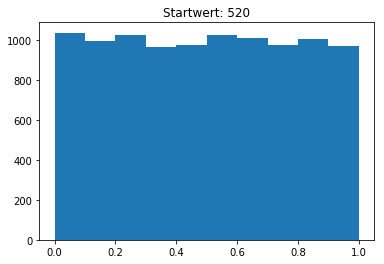

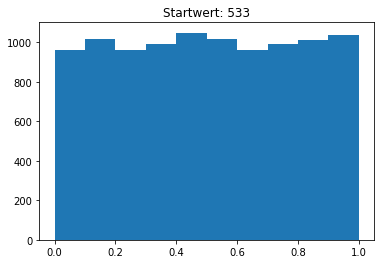

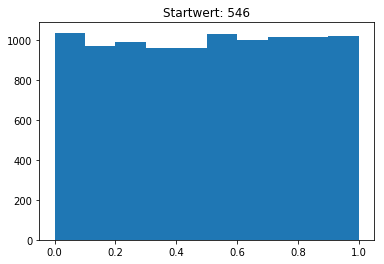

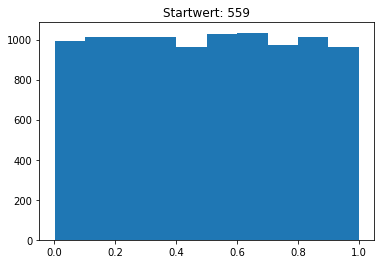

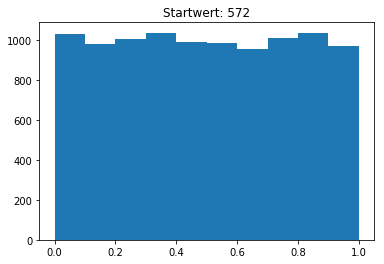

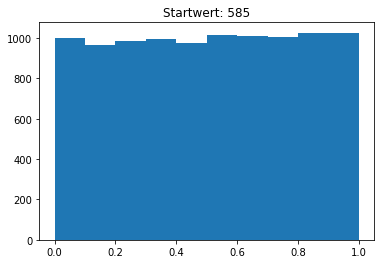

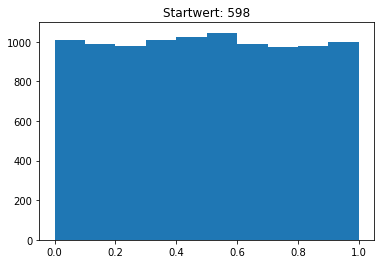

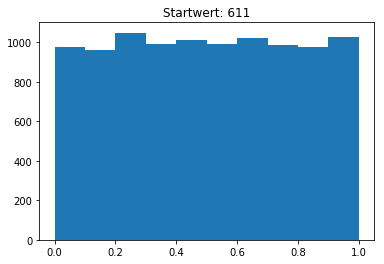

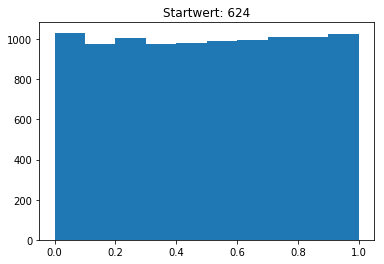

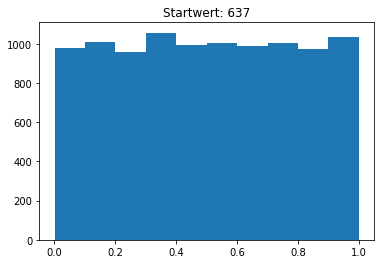

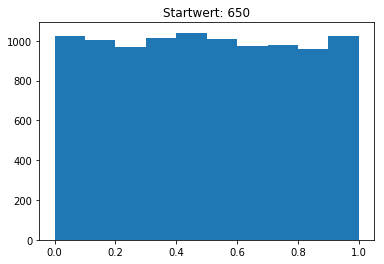

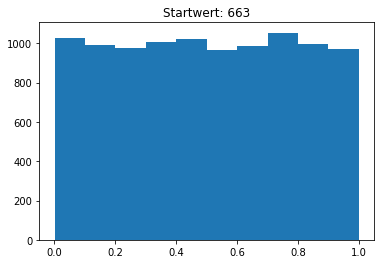

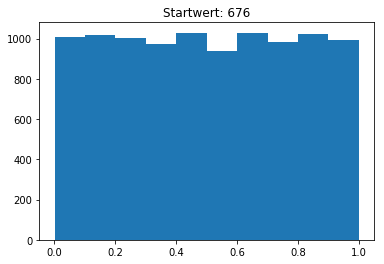

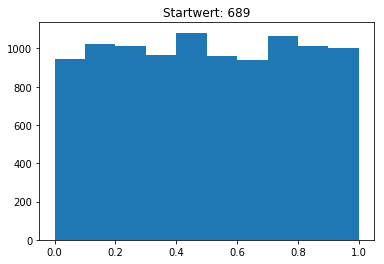

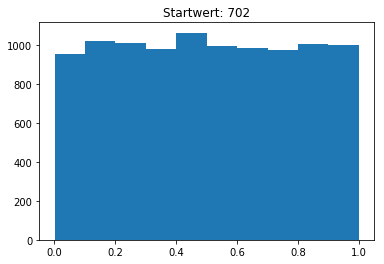

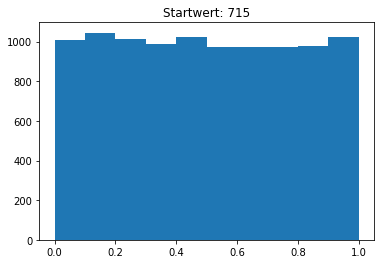

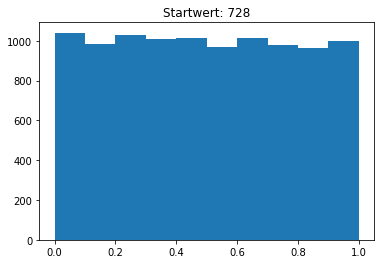

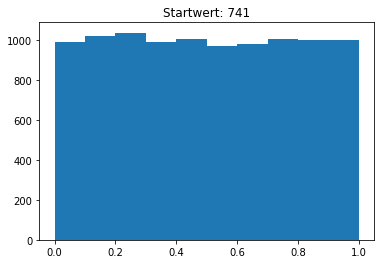

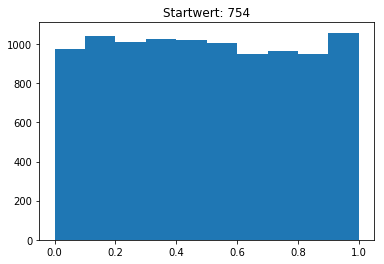

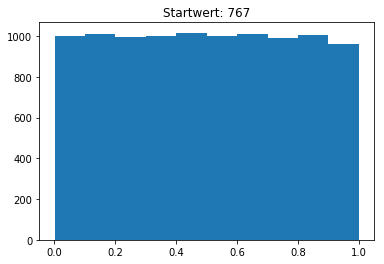

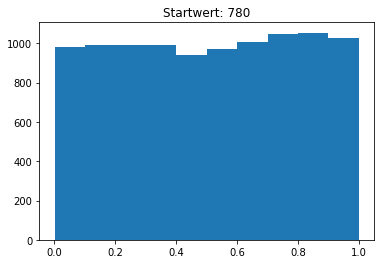

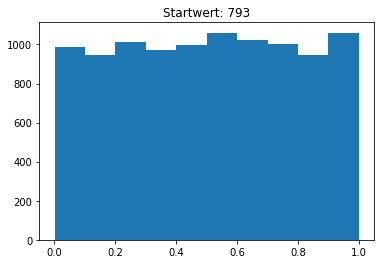

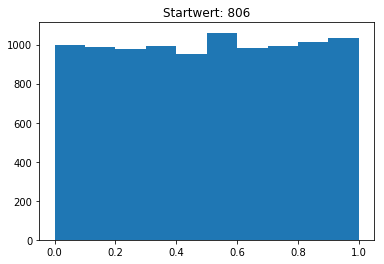

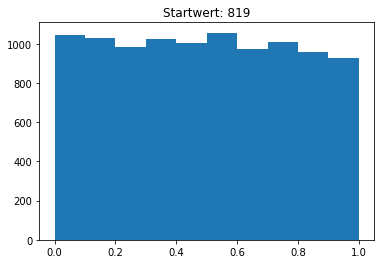

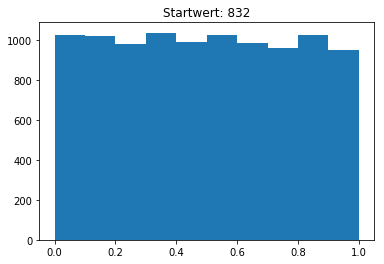

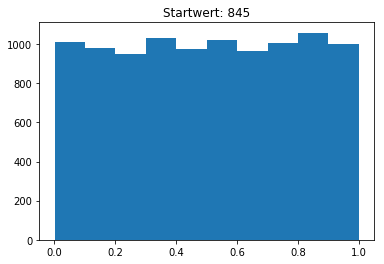

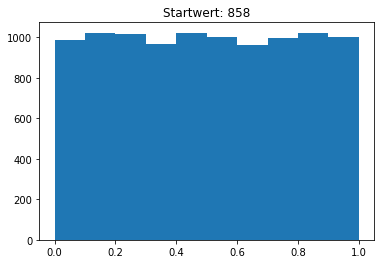

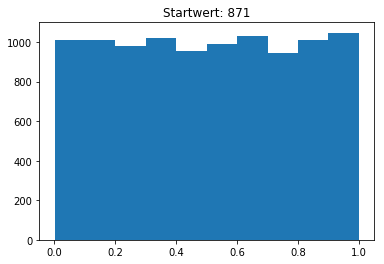

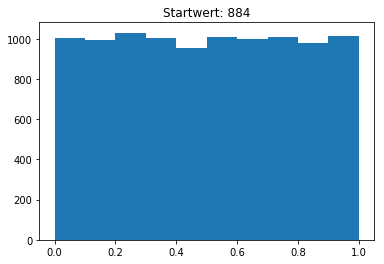

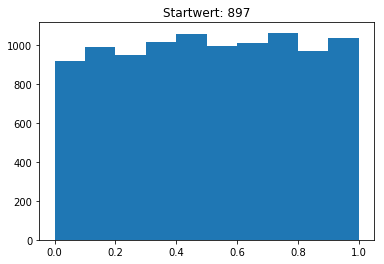

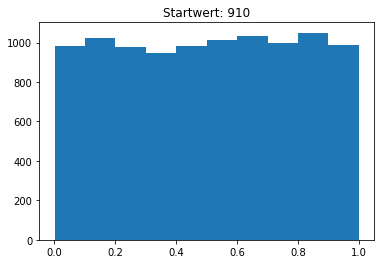

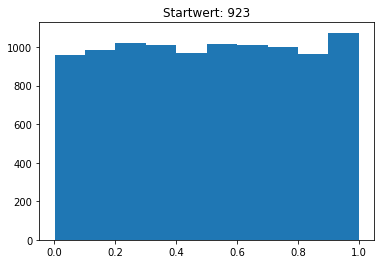

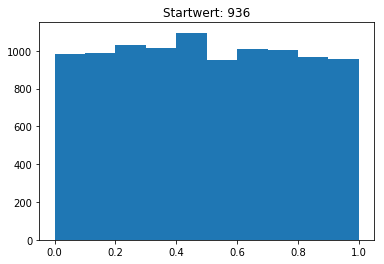

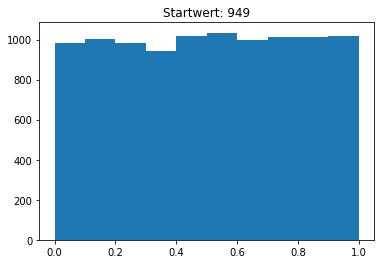

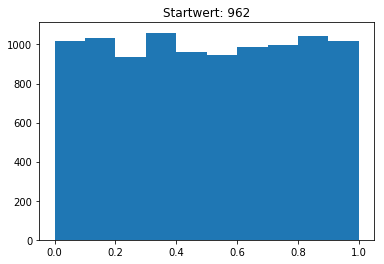

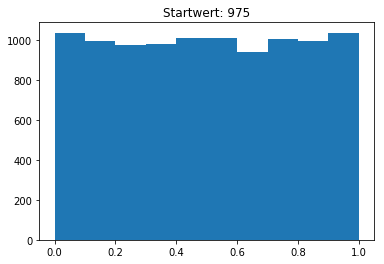

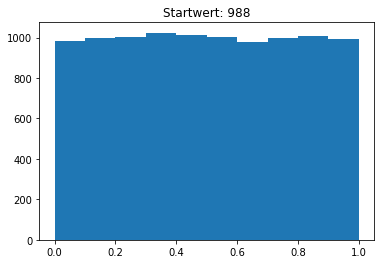

In [30]:
for i in range(0,1000,13):
    np.random.seed(i)
    random_numbers_uni = np.random.uniform(size=10000)
    plt.hist(random_numbers_uni)
    plt.title(f'Startwert: {i}')
    plt.show()

Die Histogramme unterscheiden sich signifikanter voneinander.

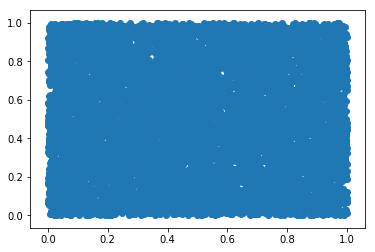

In [31]:
plt.scatter(random_numbers_uni[:-1:1],random_numbers_uni[1::1])

Deutlich erkennt man das es sich hier wieder um eine gleichverteilte Verteilung handelt.

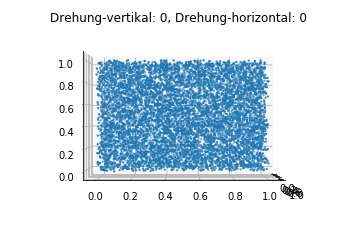

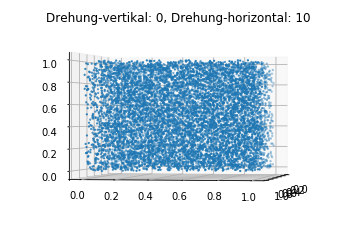

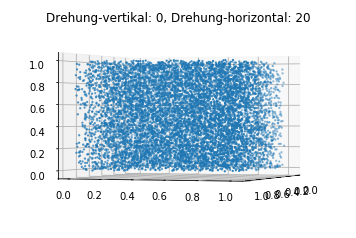

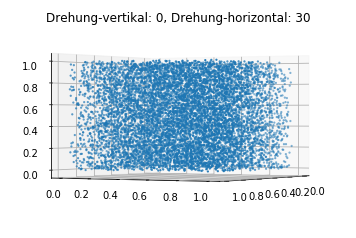

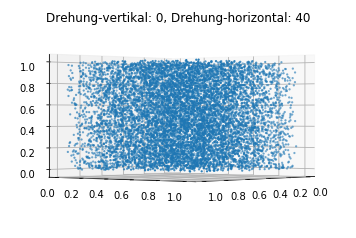

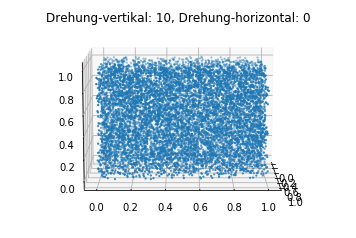

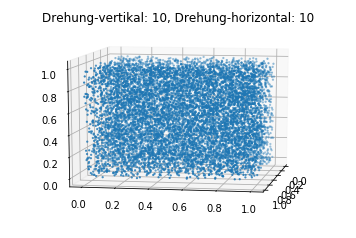

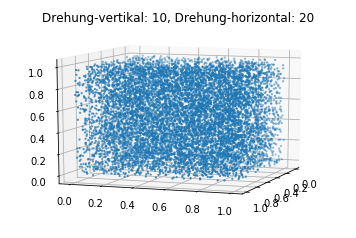

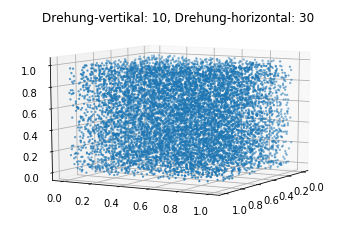

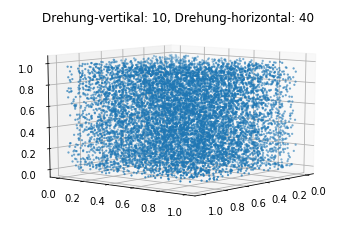

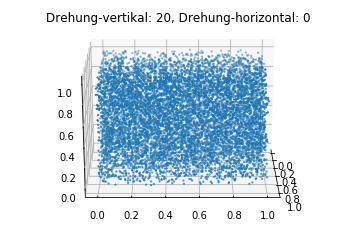

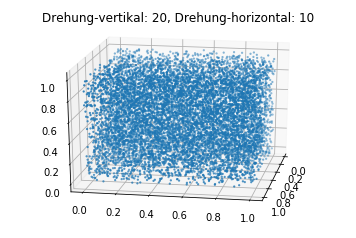

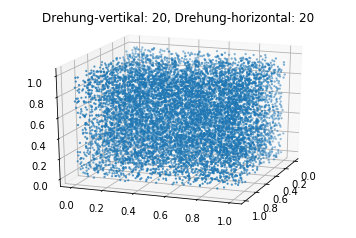

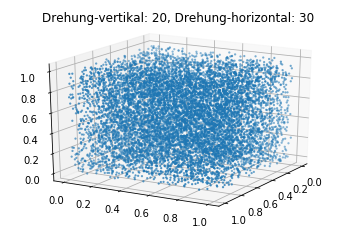

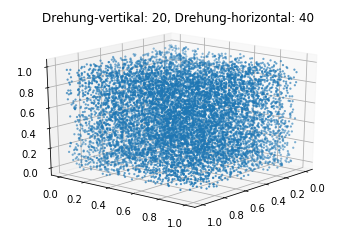

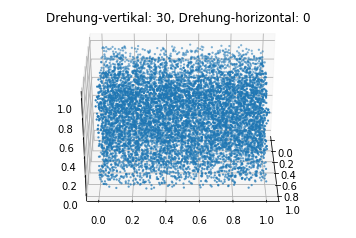

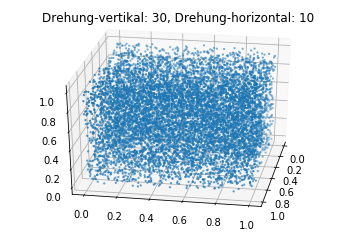

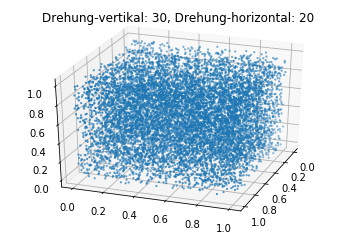

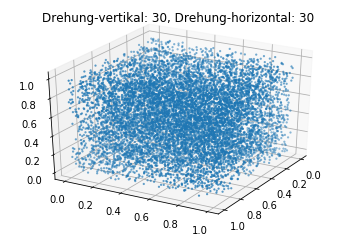

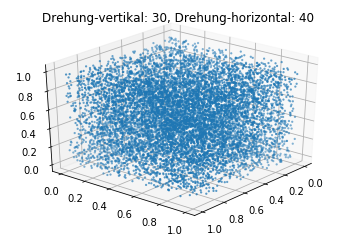

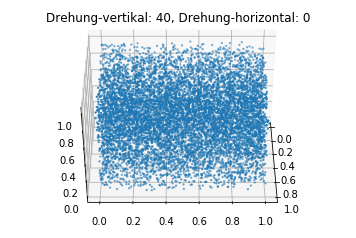

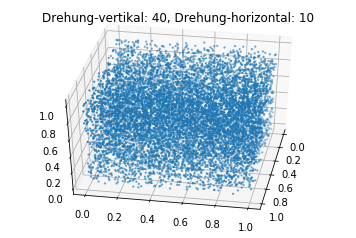

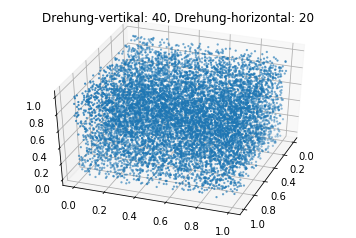

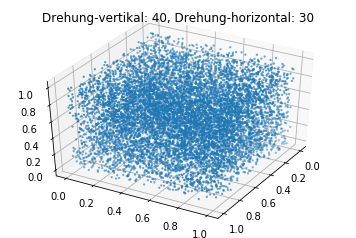

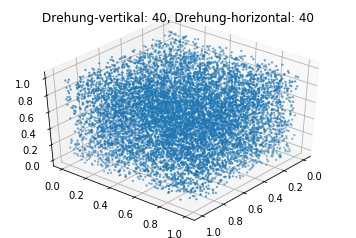

In [32]:
for i in range(0,45,10):
    for j in range(0,45,10):
        fig = plt.figure()
        ax = fig. add_subplot (111 , projection ='3d')
        ax.view_init(i, j) 
        ax.scatter(random_numbers_uni[0:-2:1], random_numbers_uni[1:-1:1], random_numbers_uni[2::1], lw=0, s=5)
        plt.title(f'Drehung-vertikal: {i}, Drehung-horizontal: {j}')
        plt.show()

Keine Ebenenen zu erkennen, sehr gut.

# Nummer 3

## Aufgabenteil a)
Der *Korrelationskoeffizient* ist definiert als:

$$
\rho(x_i,x_j)=\frac{\mathrm{cov}(x_i,x_j)}{\sigma(x_i)\sigma(x_j)}
$$

Mit den Werten aus der Aufgabenstellung folgt somit:

In [33]:
cov_ij = 4.2
sigma_i = 3.5
sigma_j = 1.5

In [34]:
def korrelation_coe(cov, sigma_i, sigma_j):
    return cov/(sigma_i*sigma_j)

In [35]:
print('Der Korrelationskoeffizient beträgt:', korrelation_coe(cov_ij, sigma_i, sigma_j))

Der Korrelationskoeffizient beträgt: 0.8


## Aufgabenteil b)

Ist $f(\vec{x})$ eine $N$ dimensionale Gaußverteilung mit $\vec{x}\in\mathbb{R}^N$ Zahlen.
So lässt sich diese, nach der Vorlesung, schreiben als:

$$
f(\vec{x}) = k\exp\left(-\frac{1}{2}(\vec{x}-\vec{a})^\intercal\,\mathbf{B}\,(\vec{x}-\vec{a})\right), \quad \mathbf{B}\in\mathbb{R}^{N\times N}
$$

Die Verteilung lässt sich mit _standitisierten Variabelen_
$$
u_i = \frac{x_i-a_i}{\sigma_i}
$$
schreiben zu:
$$
f(\vec{u}) = k\exp\left(-\frac{1}{2}\vec{u}^\intercal\,\mathbf{B}\,\vec{u}\right)
$$

Linien gleicher Wahrscheinlichkeiten unterliegen der Bedingung:

$$
f(\vec{u})=\mathrm{const}
$$

Aus der Bedingung folgt direkt:

$$
\Rightarrow \quad -\frac{1}{2}\vec{u}^\intercal\,\mathbf{B}\,\vec{u} = \mathrm{const}\qquad (1)
$$
Die Matrix $\mathrm{B}$ ist die * inverse Kovarianzmatrix* und kann geschrieben werden als:

$$
\mathrm{B} = \frac{1}{A} \begin{pmatrix} \sigma_1^2 & -\mathrm{cov}(x_1,x_2) & \dots & -\mathrm{cov}(x_1,x_N) \\ -\mathrm{cov}(x_1,x_2) & \sigma_2^2 & \dots & -\mathrm{cov}(x_N,x_2) \\
\vdots & \vdots & \ddots & \vdots \\
-\mathrm{cov}(x_1,x_N) & -\mathrm{cov}(x_N,x_2) & \dots & \sigma_N^2 
\end{pmatrix}
$$

Hierbei ist der Vorfaktor $\frac{1}{A}\in\mathbb{R}$ der für den Beweis keine weitere Rolle spielt. Rechnerisch ergibt er sich bei der Invertierung der Kovaraianzmatrix.
Für man die Vektor- und Matrixmultiplikation in Gleichung __(1)__ aus ergibt sich:

$$
\Sigma_i^{N} \sigma_i^2u_i^2 - \Sigma_{i,j}^{N} \mathrm{cov}(x_i,x_j) u_i u_j = \mathrm{const}
$$

Das ist eine *Elipssengleichung*. Somit sind alle Kurven gleicher Wahrscheinlichkeit Ellipsen.

## Aufgabenteil c)

In [36]:
mu_x = 4
mu_y = 2

In [37]:
def two_d_gauss(x, y, mu_x, mu_y, sigma_x, sigma_y, cov):
    u_x = (x - mu_x) / sigma_x
    u_y = (y - mu_y) / sigma_y
    rho = cov / (sigma_x * sigma_y)
    nomination = 2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2)
    return 1/nomination * np.exp( (-1 / (2 * (1 - rho**2))) * ( u_x**2 + u_y**2 - 2*u_x*u_y) )

Um die Verteilung zu Plotten generiere ich Zufallszahlen, um diese anschließend oben einzusetzen.

In [38]:
#x = np.linspace(mu_x-4, mu_x+4, 5000)
#y = np.linspace(mu_y-4, mu_y+4, 5000)

x = np.random.uniform(low=-2, high=9, size=10000)
y = np.random.uniform(low=-2, high=6, size=10000)

In [ ]:
#fig = plt.figure()
#ax = fig.gca(projection = '3d')

#X, Y = np.meshgrid(x, y)
#Z = two_d_gauss(X, Y, mu_x, mu_y, sigma_i, sigma_j, cov_ij)

#ax.plot_surface(X, Y, Z)

MemoryError: 

In [ ]:
Z = two_d_gauss(x, y, mu_x, mu_y, sigma_i, sigma_j, cov_ij)


In [ ]:
plt.scatter(x, y, c=Z)